<H1 style="border:#0E1716;border-width:20px; border-style:ridge;background-color:#022B26;"><p style="color:white;text-align:center;"><br> House Price Prediction <br></p></H1>

<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
    
<H2 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#98E0C8;"><br> Problem Statement<br> </H2>
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;"><b>
    1) Create a robust machine learning algorithm to accurately predict the price of the house given the various 
       factors across the market    
    2) Determine the relationship between the house features and how the price varies basis this.</b><br>
</p>
</pre> 

</div>

<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
    
<H2 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#98E0C8;"><br>Summary of Steps followed<br></H2>
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;"><b>

      1) The datas are checked for null values and then treated
      
      2) The categorical labels are encoded
      
      3) The datas are seperated into x and y
      
      4) The x DataFrame is arranged in order of highest correlation with y.
      
      5) The highest intercorrelated x features are removed from the Dataframe x.
      
      6) The outliers are imputed.
      
      7) The Train Test Split applied to x
      
      8) The scaling is done only on the numerical datas.
      
      9) The Feature selection is done through
          
           a) SelectfromModel with RF
           
           b) Top correlated features with y.
           
           c) PCA
           
           d) RFE
        
      10) Tried out the models
          
           a) RandomForestRegressor
           
           b) Gradient Boosting
           
           c) XGBoost.
           
           d) Linear Regression
           
           e) Lasso
           
           f) Ridge
       
       11) Applied CV instead of test train split to the data
       
       12) Compared results obtained for all the alogorithms.
       
       13) Hyperparameter tunning done for the algoritm producing the best result
       
       14) Conclution obtained through the analysis.

</b>
</p>
</pre>
</div>


       

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import statsmodels.api as sm

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold, KFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

<H2 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#98E0C8;"><br>Read the Data <br></H2>

In [111]:
data = pd.read_csv('data.csv',index_col=0)
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows', None)

In [112]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;">
   From the info obtained above it is understood that the dataset contains 80 features with 1460 records. The breakup
   of the features into the different datatypes are listed below
    
|Data Type||No: of Columns|
|----||----|
|Float||3|
|Integer||34|
|Object||43|


</p>
</pre>
</div>

In [114]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;">
  Define a user defined function <b>(list_null) </b> that takes a dataframe as the argument. 
  Thefunction does the following<br>
     a) lists out all features that have a null value in it
     b) it gives the total number of null values in a column and also tells what percentage of the values 
        in that column are Null valued
     c) if there are no features with null values then a message None is printed out.<br>
</p>
</pre>
</div>
   

In [115]:
def list_null(df):
    i=0
    j=0
    column = np.array(df.columns)
    print("Null Values \n")
    for i in range (0,len(df.columns)):
        if(df.iloc[:,i].isnull().sum()!=0):
            percent = (df.iloc[:,i].isnull().sum())/(df.iloc[:,i].isnull().count())
            print("{:20} :\t {} \t {:0.2f}%  null values".format(column[i],df.iloc[:,i].isnull().sum(),percent*100))
        else:
            j=j+1
    if(j==len(df.columns)):
        print('None')

In [116]:
list_null(data)

Null Values 

LotFrontage          :	 259 	 17.74%  null values
Alley                :	 1369 	 93.77%  null values
MasVnrType           :	 8 	 0.55%  null values
MasVnrArea           :	 8 	 0.55%  null values
BsmtQual             :	 37 	 2.53%  null values
BsmtCond             :	 37 	 2.53%  null values
BsmtExposure         :	 38 	 2.60%  null values
BsmtFinType1         :	 37 	 2.53%  null values
BsmtFinType2         :	 38 	 2.60%  null values
Electrical           :	 1 	 0.07%  null values
FireplaceQu          :	 690 	 47.26%  null values
GarageType           :	 81 	 5.55%  null values
GarageYrBlt          :	 81 	 5.55%  null values
GarageFinish         :	 81 	 5.55%  null values
GarageQual           :	 81 	 5.55%  null values
GarageCond           :	 81 	 5.55%  null values
PoolQC               :	 1453 	 99.52%  null values
Fence                :	 1179 	 80.75%  null values
MiscFeature          :	 1406 	 96.30%  null values


<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;">
  The features <b>'Alley', 'PoolQc','Fence','MiscFeature' </b>have very low number of valid non Null entries.
  Hence they can be dropped from the dataset


|Feature||No:of Null||Percentage of Null Values||Action Taken|
|----||----||----||----|
|Alley||1369||93.77%||Drop this feature from dataset|
|PoolQc||1453||99.52%||Drop this feature from dataset|
|Fence||1179||80.75%||Drop this feature from dataset|
|MiscFeature||1406||96.30%||Drop this feature from dataset|

</p>
</pre>

</div>

In [117]:
data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

<H2 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#98E0C8;"><br>Split the dataset into two dataframes Numerical and Categorical <br></H2>

In [118]:
# Categorical DataFrame
categorical_data = pd.DataFrame(data.select_dtypes(include=object))
categorical_column = categorical_data.columns

# Numerical DataFrame
numeric_data = pd.DataFrame(data.select_dtypes(exclude=object))
numerical_column = numeric_data.columns

<H2 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#98E0C8;"><br>Find and Replace the NaN values<br></H2>

In [119]:
# List the null values in categorical data
list_null(categorical_data)

Null Values 

MasVnrType           :	 8 	 0.55%  null values
BsmtQual             :	 37 	 2.53%  null values
BsmtCond             :	 37 	 2.53%  null values
BsmtExposure         :	 38 	 2.60%  null values
BsmtFinType1         :	 37 	 2.53%  null values
BsmtFinType2         :	 38 	 2.60%  null values
Electrical           :	 1 	 0.07%  null values
FireplaceQu          :	 690 	 47.26%  null values
GarageType           :	 81 	 5.55%  null values
GarageFinish         :	 81 	 5.55%  null values
GarageQual           :	 81 	 5.55%  null values
GarageCond           :	 81 	 5.55%  null values


In [120]:
# List the null values in numeric data
list_null(numeric_data)

Null Values 

LotFrontage          :	 259 	 17.74%  null values
MasVnrArea           :	 8 	 0.55%  null values
GarageYrBlt          :	 81 	 5.55%  null values


<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>Display the datas that has NaN values and analyse them with the rest of the features<br></H6>

In [121]:
d1=data[data.FireplaceQu.isna()]
d1.loc[:,['FireplaceQu','Fireplaces']]

,FireplaceQu,Fireplaces
Id,,
1,NaN,0
6,NaN,0
11,NaN,0
13,NaN,0
16,NaN,0
18,NaN,0
19,NaN,0
20,NaN,0
27,NaN,0


In [122]:
d2=data[data.GarageType.isna()]
d2.loc[:,['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','GarageArea','GarageCars']]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,GarageArea,GarageCars
Id,,,,,,,
40,NaN,NaN,NaN,NaN,NaN,0,0
49,NaN,NaN,NaN,NaN,NaN,0,0
79,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0
100,NaN,NaN,NaN,NaN,NaN,0,0
109,NaN,NaN,NaN,NaN,NaN,0,0
126,NaN,NaN,NaN,NaN,NaN,0,0
128,NaN,NaN,NaN,NaN,NaN,0,0


In [123]:
d3=data[data.BsmtQual.isna()]
data.loc[[333,949]]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
333,20,RL,85.0,10655,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,0,10,2009,WD,Normal,284000
949,60,RL,65.0,14006,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,0,2,2006,WD,Normal,192500


In [124]:
d3.loc[:,['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','TotalBsmtSF']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF
Id,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0
40,NaN,NaN,NaN,NaN,NaN,0
91,NaN,NaN,NaN,NaN,NaN,0
103,NaN,NaN,NaN,NaN,NaN,0
157,NaN,NaN,NaN,NaN,NaN,0
183,NaN,NaN,NaN,NaN,NaN,0
260,NaN,NaN,NaN,NaN,NaN,0
343,NaN,NaN,NaN,NaN,NaN,0
363,NaN,NaN,NaN,NaN,NaN,0


In [125]:
d4=data[data.MasVnrType.isna()]
d4.loc[:,['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
Id,,
235,NaN,NaN
530,NaN,NaN
651,NaN,NaN
937,NaN,NaN
974,NaN,NaN
978,NaN,NaN
1244,NaN,NaN
1279,NaN,NaN


In [126]:
data[data.LotFrontage.isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
13,20,RL,NaN,12968,Pave,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,0,9,2008,WD,Normal,144000
15,20,RL,NaN,10920,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,0,5,2008,WD,Normal,157000
17,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,700,3,2010,WD,Normal,149000
25,20,RL,NaN,8246,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,0,5,2010,WD,Normal,154000
32,20,RL,NaN,8544,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1966,2006,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1228,1228,GasA,Gd,Y,SBrkr,1228,0,0,1228,0,0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1966.0,Unf,1,271,TA,TA,Y,0,65,0,0,0,0,0,6,2008,WD,Normal,149350
43,85,RL,NaN,9180,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,SFoyer,5,7,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,747,LwQ,93,0,840,GasA,Gd,Y,SBrkr,884,0,0,884,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1983.0,RFn,2,504,TA,Gd,Y,240,0,0,0,0,0,0,12,2007,WD,Normal,144000
44,20,RL,NaN,9200,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1975,1980,Hip,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,Av,LwQ,280,BLQ,491,167,938,GasA,TA,Y,SBrkr,938,0,0,938,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1977.0,Unf,1,308,TA,TA,Y,145,0,0,0,0,0,0,7,2008,WD,Normal,130250
51,60,RL,NaN,13869,Pave,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1997,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,182,Unf,0,612,794,GasA,Gd,Y,SBrkr,794,676,0,1470,0,1,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1997.0,Fin,2,388,TA,TA,Y,0,75,0,0,0,0,0,7,2007,WD,Normal,177000


<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>Observations and Inferences<br></H6>

<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;">
      <b> 'FireplaceQu' </b> has null values corresponding to the values in <b>'Fireplaces' </b>as zero. So it 
can be inferred that there are no fireplaces at those houses. hence the null values in <b>'FireplaceQu' </b>can 
be replaced with <b>'None'.</b> <br>
</p>
</pre>
</div>

In [127]:
categorical_data.FireplaceQu.fillna(value= 'None',inplace=True)

<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;">
          The 5 columns namely <b>'GarageType', 'GarageYrBlt', 'GarageFinish','GarageQual' and 'GarageCond' </b>have
 null values for the same datas where there is no <b>GarageArea</b> nor <b>GarageCars</b>.This shows that there is 
 no Garage  in these houses. So we replace the null values with<b> 'None'</b> and <b>GarageYrBlt</b> will be replaced with 0
</p>
</pre>
</div>

In [128]:
categorical_data.GarageType.fillna(value= 'None',inplace=True)
categorical_data.GarageFinish.fillna(value= 'None',inplace=True)
categorical_data.GarageQual.fillna(value= 'None',inplace=True)
categorical_data.GarageCond.fillna(value= 'None',inplace=True)

numeric_data.GarageYrBlt.fillna(value= 0,inplace=True)

<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;">
        The column <b>'BsmtFinType2'</b> has a NaN value for record(#333) which corresponds to an error in retrieving
the data, so the null value of BsmtFinType2 for that record will be replaced with <b>'Unf'</b>.
</p>
</pre>
</div>

In [129]:
categorical_data.loc[333,'BsmtFinType2']='Unf'

<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;">
         The column <b>'BsmtExposure'</b> has null value for record(#949) that corresponds to an unfinished basement.
The null value for the particular record will be replaced with <b>'No'</b>.
</p>
</pre>
</div>

In [130]:
categorical_data.loc[949,'BsmtExposure']='No'

<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;">
                     The other null values in the columns <b>'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1' and 'BsmtFinType2' </b>corresponds to no basement at all which is evident from <b>'TotalBsmtSF'= 0 </b>for each of these records. The null values will be replaced with <b>'None'</b>
</p>
</pre>
</div>

In [131]:
categorical_data.BsmtQual.fillna(value= 'None',inplace=True)
categorical_data.BsmtCond.fillna(value= 'None',inplace=True)
categorical_data.BsmtExposure.fillna(value= 'None',inplace=True)
categorical_data.BsmtFinType1.fillna(value= 'None',inplace=True)
categorical_data.BsmtFinType2.fillna(value= 'None',inplace=True)

<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;">
          The <b>'MasVnrType'</b> and <b>'MasVnrArea'</b> have corresponding null values which implies that there is no masonry     veneer area for the respective houses. The null values will be replaced with <b>'None' </b>and 0 respectively.
</p>
</pre>
</div>

In [132]:
categorical_data.MasVnrType.fillna(value= 'None',inplace=True)

numeric_data.MasVnrArea.fillna(value= 0,inplace=True)

<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;">
  The <b>'Electrical'</b> has only 1 null value and hence it will be replaced with mode value of the column.
</p>
</pre>
</div>

In [133]:
categorical_data.Electrical.fillna(data.Electrical.mode()[0],inplace=True)

<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;">
   The null value of <b>'LotFrontage'</b> will be replaced with the mean of the column values
</p>
</pre>
</div>

In [134]:
numeric_data.LotFrontage.fillna(data.LotFrontage.mean(),inplace=True)

<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;">
   Check if any more Null Values are present
</p>
</pre>
</div>

In [135]:
list_null(categorical_data)

Null Values 

None


In [136]:
list_null(numeric_data)

Null Values 

None


<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>Placing the cleaned data back into the original dataset<br></H6>

In [137]:
data[categorical_data.columns]=categorical_data
data[numeric_data.columns]= numeric_data

<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>Obtain the unique values for each of the features <br></H6>

In [138]:
for col in data.columns:
    print('colum   "{}"     unique values :    {}'.format(col,data[col].unique()))
    print('='*90)

colum   "MSSubClass"     unique values :    [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
colum   "MSZoning"     unique values :    ['RL' 'RM' 'C (all)' 'FV' 'RH']
colum   "LotFrontage"     unique values :    [ 65.          80.          68.          60.          84.
  85.          75.          70.04995837  51.          50.
  70.          91.          72.          66.         101.
  57.          44.         110.          98.          47.
 108.         112.          74.         115.          61.
  48.          33.          52.         100.          24.
  89.          63.          76.          81.          95.
  69.          21.          32.          78.         121.
 122.          40.         105.          73.          77.
  64.          94.          34.          90.          55.
  88.          82.          71.         120.         107.
  92.         134.          62.          86.         141.
  97.          54.          41.          79.         174.
  99.          67.   

  580  678  958 1336 1079   49  830]
colum   "BsmtFinType2"     unique values :    ['Unf' 'BLQ' 'None' 'ALQ' 'Rec' 'LwQ' 'GLQ']
colum   "BsmtFinSF2"     unique values :    [   0   32  668  486   93  491  506  712  362   41  169  869  150  670
   28 1080  181  768  215  374  208  441  184  279  306  180  580  690
  692  228  125 1063  620  175  820 1474  264  479  147  232  380  544
  294  258  121  391  531  344  539  713  210  311 1120  165  532   96
  495  174 1127  139  202  645  123  551  219  606  612  480  182  132
  336  468  287   35  499  723  119   40  117  239   80  472   64 1057
  127  630  128  377  764  345 1085  435  823  500  290  324  634  411
  841 1061  466  396  354  149  193  273  465  400  682  557  230  106
  791  240  547  469  177  108  600  492  211  168 1031  438  375  144
   81  906  608  276  661   68  173  972  105  420  546  334  352  872
  110  627  163 1029]
colum   "BsmtUnfSF"     unique values :    [ 150  284  434  540  490   64  317  216  952  140  1

colum   "SalePrice"     unique values :    [208500 181500 223500 140000 250000 143000 307000 200000 129900 118000
 129500 345000 144000 279500 157000 132000 149000  90000 159000 139000
 325300 139400 230000 154000 256300 134800 306000 207500  68500  40000
 149350 179900 165500 277500 309000 145000 153000 109000  82000 160000
 170000 130250 141000 319900 239686 249700 113000 127000 177000 114500
 110000 385000 130000 180500 172500 196500 438780 124900 158000 101000
 202500 219500 317000 180000 226000  80000 225000 244000 185000 144900
 107400  91000 135750 136500 193500 153500 245000 126500 168500 260000
 174000 164500  85000 123600 109900  98600 163500 133900 204750 214000
  94750  83000 128950 205000 178000 118964 198900 169500 100000 115000
 190000 136900 383970 217000 259500 176000 155000 320000 163990 136000
 153900 181000  84500 128000  87000 150000 150750 220000 171000 231500
 166000 204000 125000 105000 222500 122000 372402 235000  79000 109500
 269500 254900 162500 412500 10320

<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
<H2 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#98E0C8;"><br>Encoding the categorical columns<br></H2>
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;">
   <b>The categorical datas are encoded in two ways:</b>

        1) A user defined function named  'convert' is created to carry out the OneHot encoding using the
           predefined get_dummies() for the non-ordinal categories.
        2) Another user defined function named 'order' is created to carry out the manual assignment of labels for 
           the ordinal categories.
</p>
</pre>
</div>


In [139]:
def convert (df,column_name):
    dt= pd.get_dummies(df[column_name],prefix= column_name)
    df.drop(column_name,axis=1,inplace=True)
    df=df.join(dt)
    return df

def order (df,column_name):
    if column_name == 'Street':
        od = {'Grvl': 0, 'Pave': 1}
    if column_name == 'LotShape':
        od = {'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3}
    if column_name == 'LandContour':
        od = {'Low':0, 'HLS':1, 'Bnk':2, 'Lvl':3}
    if column_name == 'Utilities':
        od = {'NoSeWa':0, 'AllPub':1}
    if column_name == 'LandSlope':
        od = {'Sev':0, 'Mod':1, 'Gtl':2}
    if column_name in ('ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond'):
        od = {'None':0, 'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}
    if column_name == 'BsmtExposure':
        od = {'None':0, 'No':0, 'Mn':1, 'Av':2, 'Gd':3}
    if column_name in ('BsmtFinType1','BsmtFinType2'):
        od = {'None':0, 'Unf':0, 'LwQ':1, 'Rec':2, 'BLQ':3, 'ALQ':4, 'GLQ':5}
    if column_name == 'CentralAir':
        od = {'N':0, 'Y':1}
    if column_name == 'Functional':
        od = {'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7}
    if column_name == 'GarageFinish':
        od = {'None':0, 'Unf':0,'RFn':1, 'Fin':2}
    if column_name == 'PavedDrive':
        od = {'N':0, 'P':1, 'Y':2}
    df[column_name] = df[column_name].map(od)
    return df

In [140]:
for cols in categorical_data:
    if cols in ('MSZoning','LotConfig','Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd','MasVnrType','Foundation','Heating',
       'Electrical','GarageType','SaleType', 'SaleCondition'):
        data = convert(data,cols)
    else:
        data = order(data,cols)

<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>checking for any error while encoding<br></H6>

In [141]:
list_null(data)

Null Values 

None


<H2 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#98E0C8;"><br>Split into X and y<br></H2>

In [200]:
xx = data.drop('SalePrice',axis=1)
y = data['SalePrice']

std = StandardScaler()
X = std.fit_transform(xx)
Xs = X.copy()

<H2 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#98E0C8;"><br>checking for correlation among the features<br></H2>

In [201]:
corr_features = xx.corrwith(y).sort_values(ascending=False)
print(corr_features)

OverallQual              0.790982
GrLivArea                0.714323
ExterQual                0.682639
KitchenQual              0.659600
TotalBsmtSF              0.651221
GarageCars               0.640409
GarageArea               0.623431
BsmtQual                 0.622925
1stFlrSF                 0.605852
FullBath                 0.560664
GarageFinish             0.537242
TotRmsAbvGrd             0.533723
YearBuilt                0.526958
FireplaceQu              0.526474
YearRemodAdd             0.507101
Foundation_PConc         0.497734
Fireplaces               0.466929
MasVnrArea               0.448830
HeatingQC                0.427649
Neighborhood_NridgHt     0.402149
BsmtFinSF1               0.386420
BsmtExposure             0.361863
SaleType_New             0.357509
LotFrontage              0.355609
SaleCondition_Partial    0.352060
GarageType_Attchd        0.335961
LotArea                  0.335003
MasVnrType_Stone         0.330476
Neighborhood_NoRidge     0.330424
WoodDeckSF    

In [202]:
x = xx[corr_features.index]
x.head()

,OverallQual,GrLivArea,ExterQual,KitchenQual,TotalBsmtSF,GarageCars,GarageArea,BsmtQual,1stFlrSF,FullBath,GarageFinish,TotRmsAbvGrd,YearBuilt,FireplaceQu,YearRemodAdd,Foundation_PConc,Fireplaces,MasVnrArea,HeatingQC,Neighborhood_NridgHt,BsmtFinSF1,BsmtExposure,SaleType_New,LotFrontage,SaleCondition_Partial,GarageType_Attchd,LotArea,MasVnrType_Stone,Neighborhood_NoRidge,WoodDeckSF,2ndFlrSF,OpenPorchSF,Exterior2nd_VinylSd,Exterior1st_VinylSd,BsmtFinType1,HalfBath,GarageQual,GarageCond,GarageYrBlt,CentralAir,MSZoning_RL,HouseStyle_2Story,Electrical_SBrkr,RoofStyle_Hip,GarageType_BuiltIn,PavedDrive,BsmtFullBath,BsmtCond,Neighborhood_StoneBr,BsmtUnfSF,MasVnrType_BrkFace,RoofMatl_WdShngl,BedroomAbvGr,LotConfig_CulDSac,Neighborhood_Somerst,BldgType_1Fam,Exterior1st_CemntBd,Exterior2nd_CmentBd,Neighborhood_Timber,Condition1_Norm,ScreenPorch,Functional,Heating_GasA,PoolArea,MSZoning_FV,Exterior2nd_ImStucc,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Veenker,Neighborhood_ClearCr,Condition1_PosN,Condition2_PosN,Condition2_PosA,MoSold,Exterior2nd_Other,RoofMatl_WdShake,3SsnPorch,Condition1_PosA,SaleType_Con,Street,HouseStyle_2.5Fin,Exterior1st_Stone,Neighborhood_Gilbert,Exterior1st_BrkFace,Condition2_Norm,Exterior1st_ImStucc,Exterior2nd_BrkFace,Neighborhood_NWAmes,Condition1_RRNn,RoofStyle_Shed,RoofMatl_Membran,SaleType_CWD,Neighborhood_Blmngtn,ExterCond,LotConfig_FR3,RoofStyle_Flat,Neighborhood_SawyerW,SaleType_ConLI,Utilities,Condition1_RRAn,RoofMatl_Tar&Grv,Condition1_RRNe,LotConfig_Corner,BldgType_TwnhsE,Condition2_RRAe,Foundation_Wood,RoofMatl_Metal,RoofStyle_Mansard,LotConfig_FR2,RoofMatl_ClyTile,BsmtFinSF2,Foundation_Stone,RoofMatl_Roll,Condition2_RRAn,SaleCondition_Alloca,Exterior2nd_Stone,BsmtHalfBath,Exterior1st_Plywood,Heating_GasW,Neighborhood_Blueste,MiscVal,GarageType_2Types,Exterior2nd_AsphShn,Exterior1st_CBlock,Exterior2nd_CBlock,LowQualFinSF,Heating_OthW,HouseStyle_2.5Unf,Exterior1st_AsphShn,SaleType_ConLw,YrSold,GarageType_Basment,Exterior1st_Stucco,BsmtFinType2,Condition2_Artery,SaleType_Oth,RoofStyle_Gambrel,Heating_Floor,Electrical_Mix,Neighborhood_NPkVill,HouseStyle_SLvl,Condition2_RRNn,Exterior2nd_Wd Shng,SaleType_ConLD,Exterior2nd_Stucco,MasVnrType_BrkCmn,SaleCondition_Family,Condition1_RRAe,Exterior2nd_Brk Cmn,Electrical_FuseP,Condition2_Feedr,SaleCondition_AdjLand,LandSlope,Exterior1st_BrkComm,Exterior1st_WdShing,Exterior2nd_Plywood,Neighborhood_Mitchel,Heating_Wall,HouseStyle_1Story,Neighborhood_SWISU,MSZoning_RH,Exterior2nd_HdBoard,GarageType_CarPort,LandContour,OverallCond,LotConfig_Inside,SaleType_COD,MSSubClass,HouseStyle_1.5Unf,Heating_Grav,HouseStyle_SFoyer,Exterior1st_HdBoard,BldgType_2fmCon,BldgType_Twnhs,Exterior2nd_AsbShng,Neighborhood_BrDale,RoofMatl_CompShg,Condition1_Artery,Exterior1st_AsbShng,MSZoning_C (all),Neighborhood_MeadowV,BldgType_Duplex,Condition1_Feedr,SaleCondition_Abnorml,Foundation_Slab,Electrical_FuseF,Neighborhood_Sawyer,EnclosedPorch,KitchenAbvGr,Neighborhood_BrkSide,SaleCondition_Normal,Exterior1st_Wd Sdng,Exterior2nd_Wd Sdng,Exterior2nd_MetalSd,HouseStyle_1.5Fin,Neighborhood_IDOTRR,Exterior1st_MetalSd,Neighborhood_Edwards,Neighborhood_NAmes,Neighborhood_OldTown,Electrical_FuseA,Foundation_BrkTil,RoofStyle_Gable,GarageType_None,SaleType_WD,LotShape,MSZoning_RM,Foundation_CBlock,GarageType_Detchd,MasVnrType_None
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,7,1710,3,3,856,2,548,3,856,2,1,8,2003,0,2003,1,0,196.0,4,0,706,0,0,65.0,0,1,8450,0,0,0,854,61,1,1,5,1,2,2,2003.0,1,1,1,1,0,0,2,1,2,0,150,1,0,3,0,0,1,0,0,0,1,0,7,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,3,5,1,0,60,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,0,0,0

<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>Checking the distribution of the target<br></H6>

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

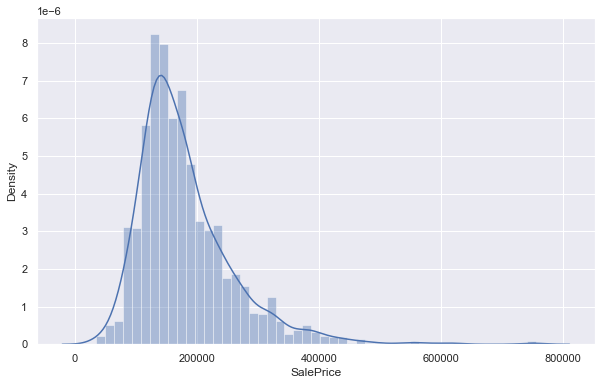

In [203]:

plt.figure(figsize=(10,6))
sns.distplot(data.SalePrice)

<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>Ploting the heat map for all the features<br></H6>

<AxesSubplot:ylabel='Id'>

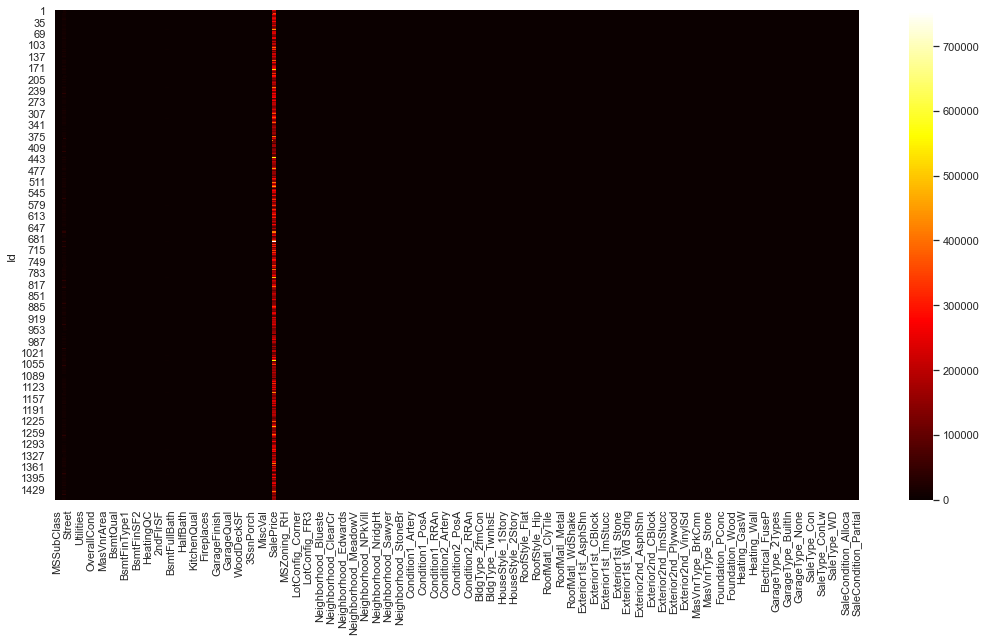

In [204]:
plt.figure(figsize=(18,9))
sns.heatmap(data,cbar=True,cmap='hot')

<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;">
  Due to the huge number of features, the heatmap is illegible
</p>
</pre>
</div>

<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>Find the most inter correlated variables to avoid Multicollinearity<br></H6>

In [205]:
corr_matrix = x.corr()
colname=[]
for i in range(len(corr_matrix.columns)):
    j=i
    for j in range(i):
        if ((corr_matrix.iloc[i,j])>0.8)&((corr_matrix.iloc[i,j])<1):
            colname.append(corr_matrix.columns[i])
            break
colname            
            


['GarageArea',
 '1stFlrSF',
 'TotRmsAbvGrd',
 'Fireplaces',
 'SaleCondition_Partial',
 'Exterior1st_VinylSd',
 'GarageCond',
 'GarageYrBlt',
 'HouseStyle_2Story',
 'Exterior2nd_CmentBd',
 'MSZoning_FV',
 'RoofMatl_Tar&Grv',
 'BsmtFinType2',
 'Exterior1st_HdBoard',
 'Exterior1st_AsbShng',
 'Exterior2nd_Wd Sdng',
 'Exterior1st_MetalSd']

<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;">
  Create new dataframe by dropping the columns identified in previous step (colname)
</p>
</pre>
</div>

In [206]:
x.drop(colname,axis=1,inplace=True)
x.shape

(1460, 193)

<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>Ploting all features according to their correlation<br></H6>

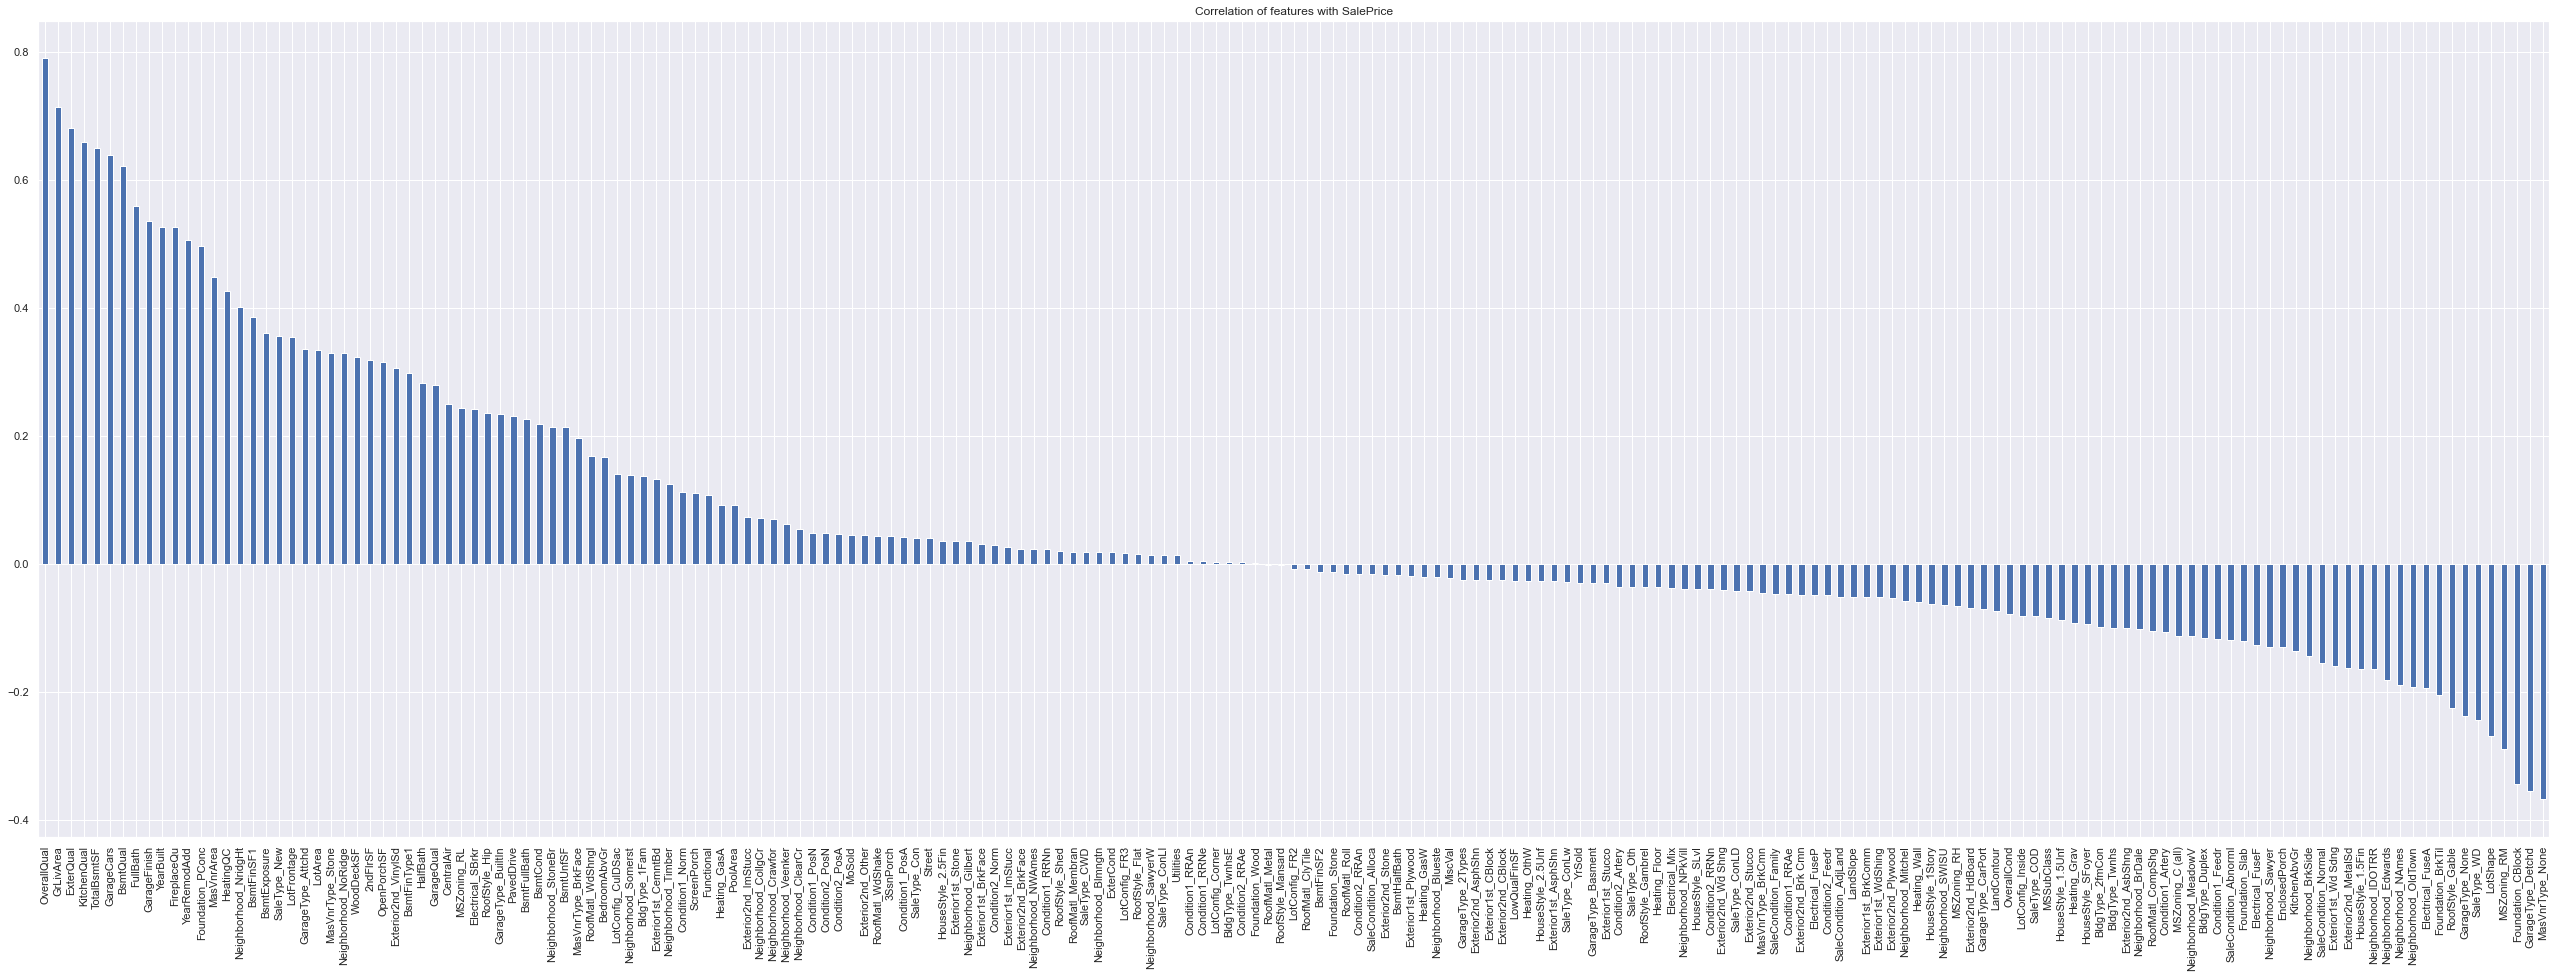

In [207]:
sns.set(font_scale=1)
x.corrwith(y).plot(kind='bar',grid=True,figsize=(45,15),title='Correlation of features with SalePrice')
plt.show()

<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>Ploting top correlated features<br></H6>

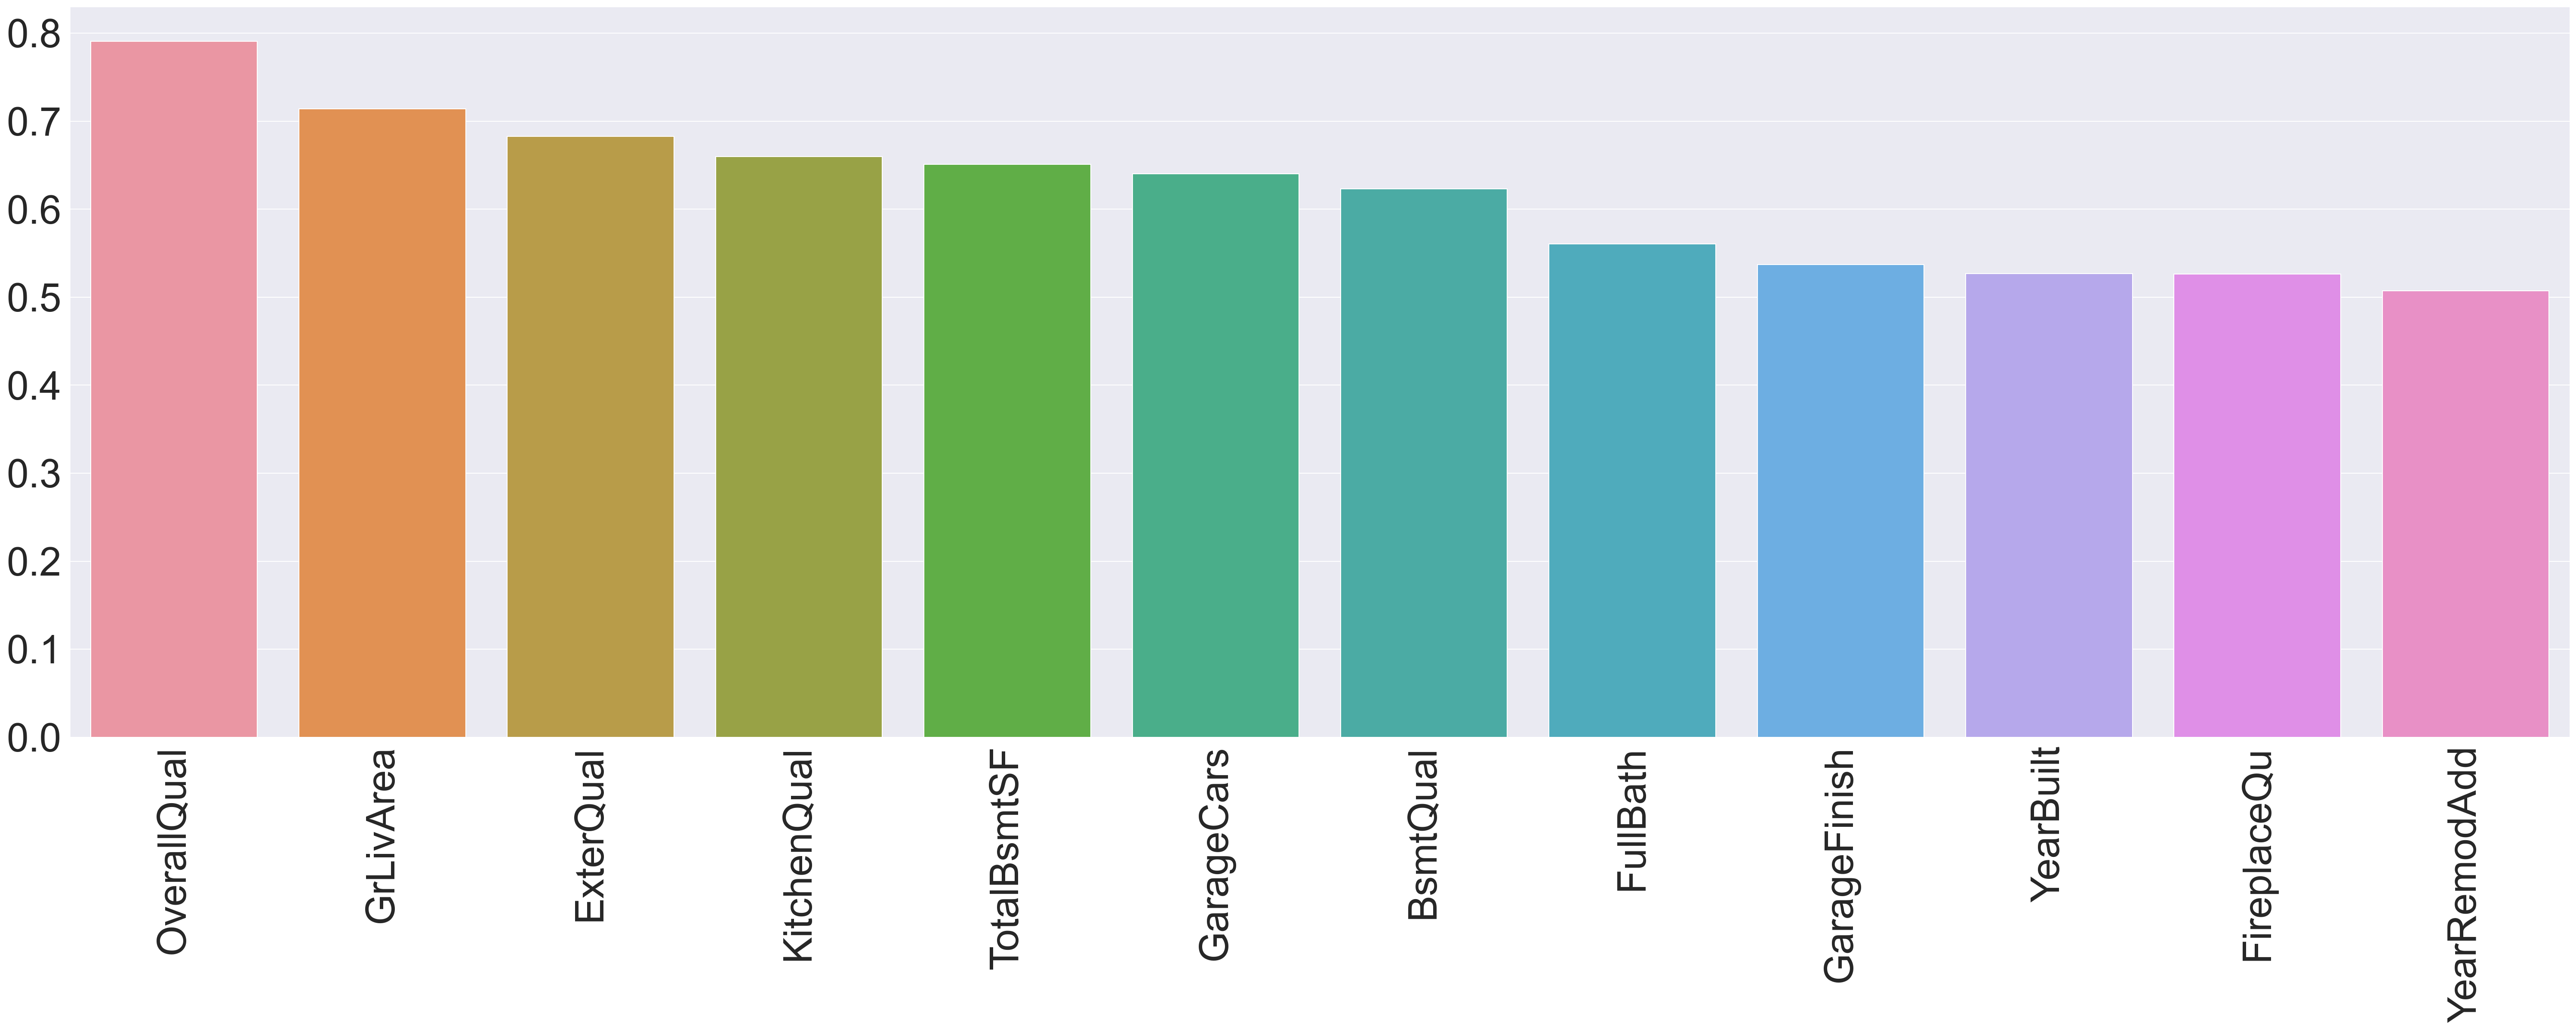

OverallQual     0.790982
GrLivArea       0.714323
ExterQual       0.682639
KitchenQual     0.659600
TotalBsmtSF     0.651221
GarageCars      0.640409
BsmtQual        0.622925
FullBath        0.560664
GarageFinish    0.537242
YearBuilt       0.526958
FireplaceQu     0.526474
YearRemodAdd    0.507101
dtype: float64


In [208]:
corr = abs(x.corrwith(y)).sort_values(ascending = False)
xa_corr = corr[corr >= 0.5]
plt.figure(figsize = (50, 15),dpi=150)
sns.set(font_scale=4)

sns.barplot(x = xa_corr.index, y = xa_corr.values)
plt.xticks(rotation = 90)
plt.show()
print(xa_corr)

<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>visualising the interrelation between the top ten correlated features with saleprice<br></H6>

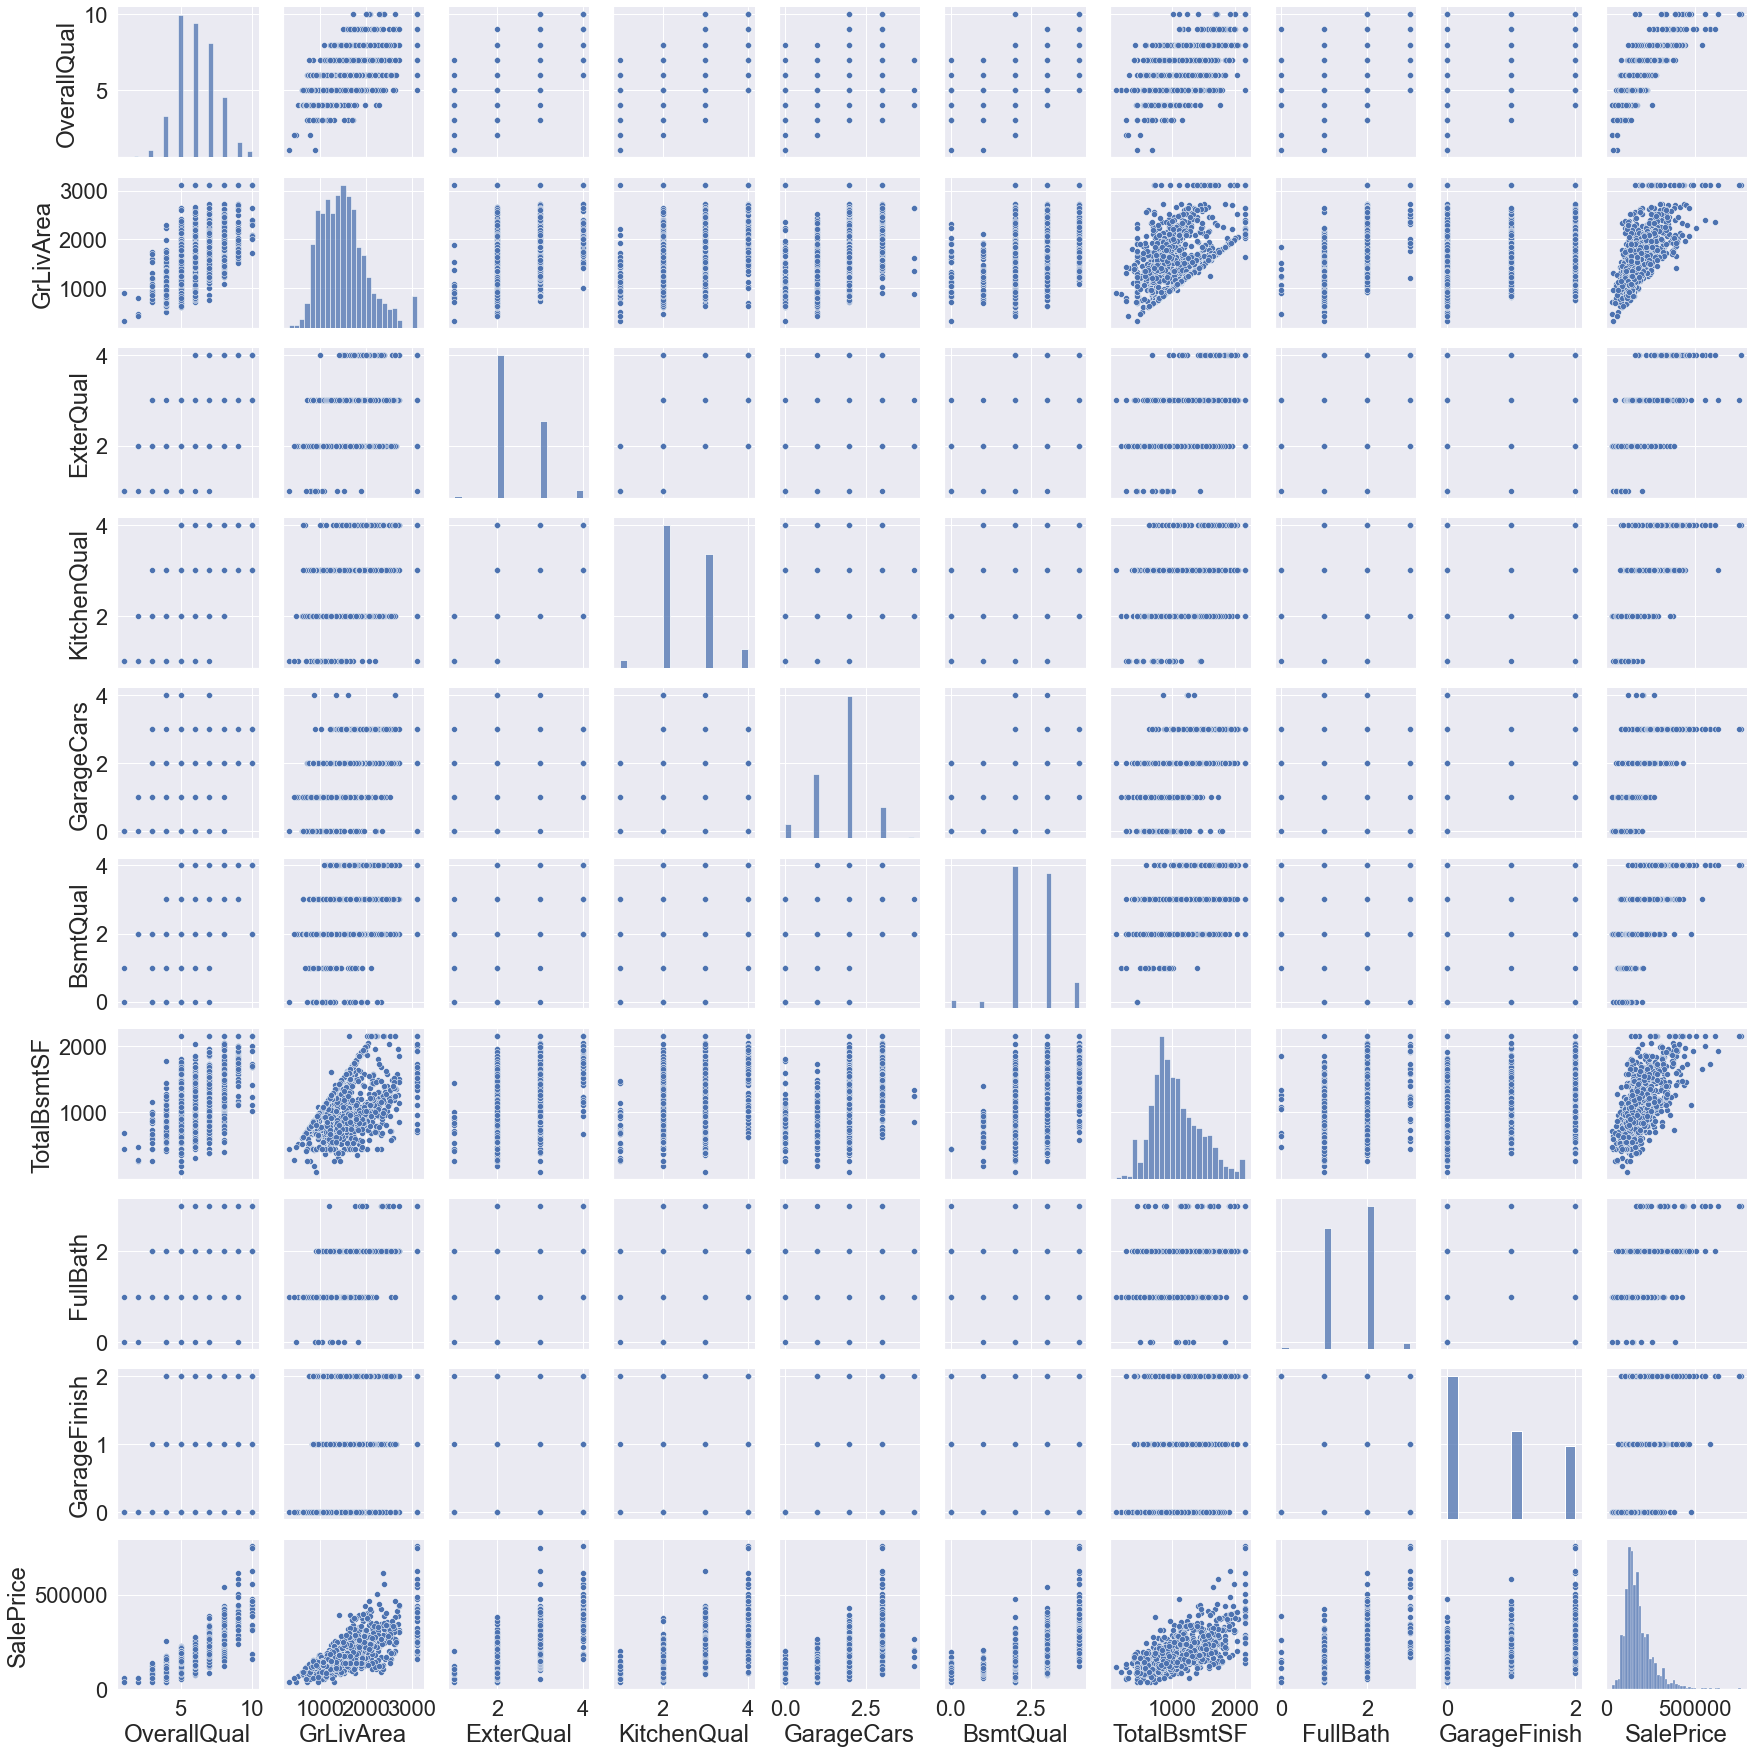

In [209]:
sns.set(font_scale=2)
sns.pairplot(data,vars=['OverallQual','GrLivArea','ExterQual','KitchenQual','GarageCars',
                        'BsmtQual','TotalBsmtSF','FullBath','GarageFinish','SalePrice'])

<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>Heatmap of the top ten correlated features with saleprice<br></H6>

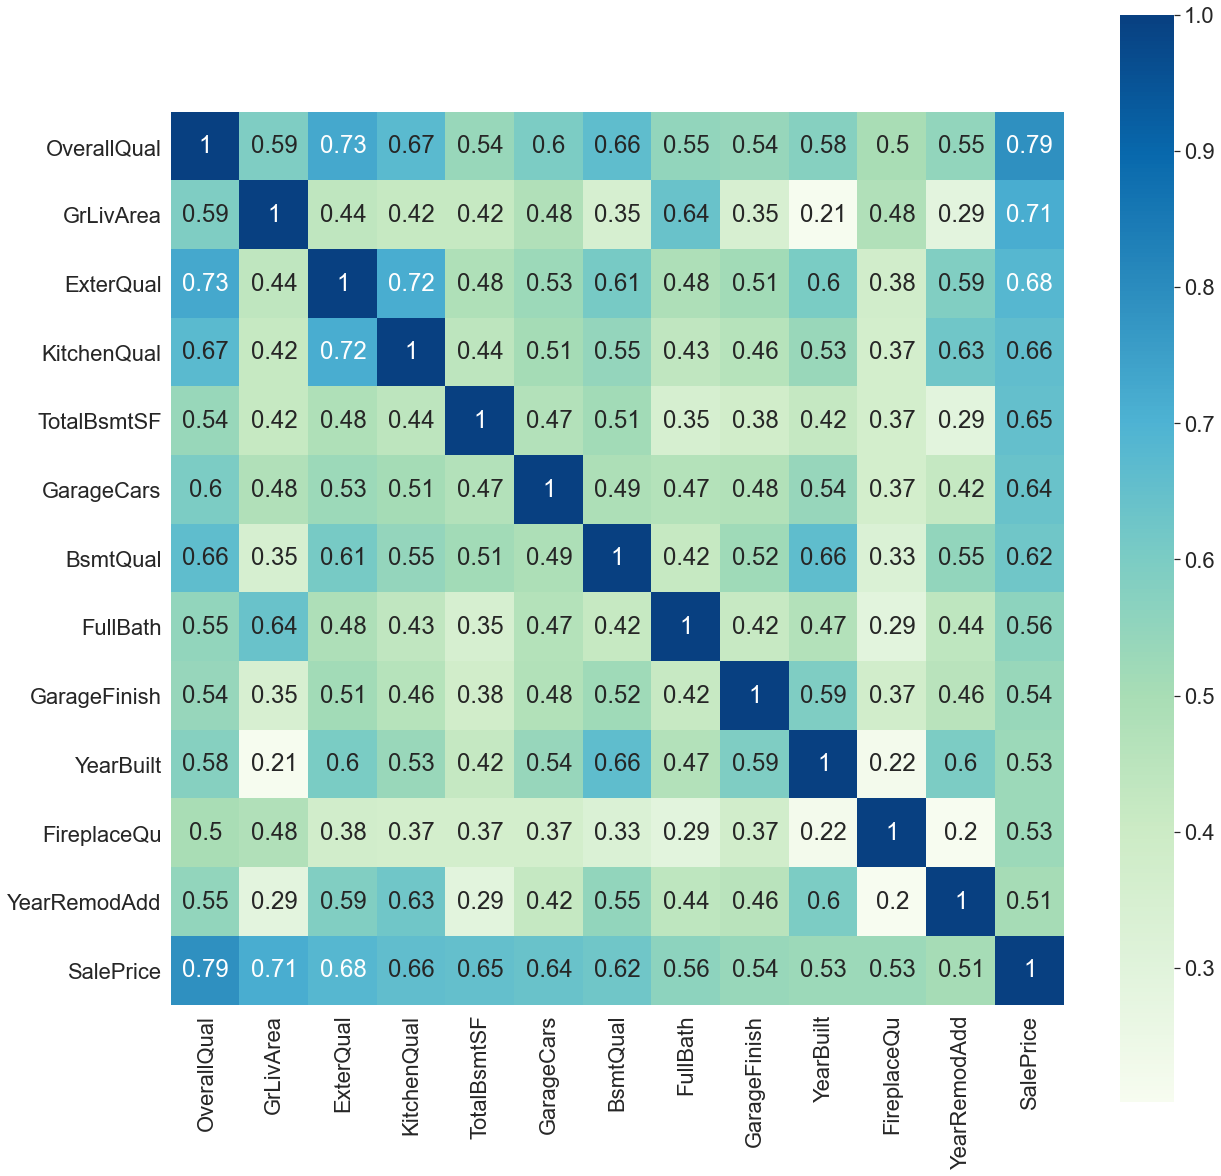

In [210]:
plt.figure(figsize=(20,20))
sns.heatmap(data[xa_corr.index].join(data.SalePrice).corr(),square=True,annot=True,cmap='GnBu')
plt.show()

<H2 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#98E0C8;"><br>Check for outliers<br></H2>

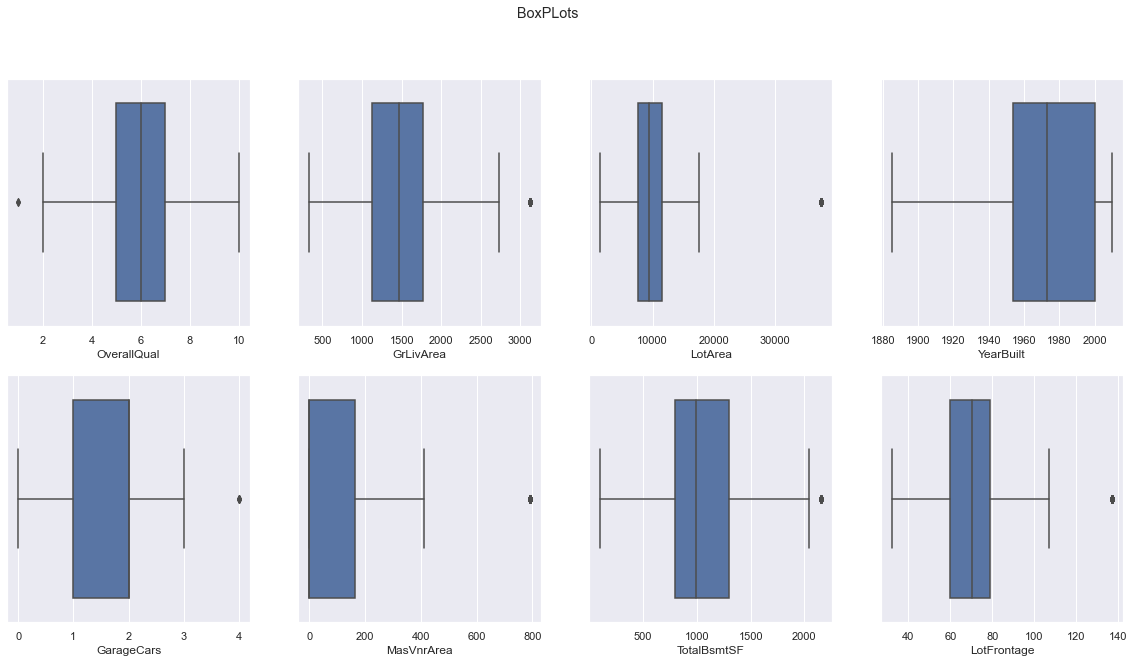

In [211]:
sns.set(font_scale=1)
fig,axs = plt.subplots(2,4,figsize=(20,10))

sns.boxplot(x=data.OverallQual,ax=axs[0][0])
sns.boxplot(x=data.GrLivArea,ax=axs[0][1])
sns.boxplot(x=data.LotArea,ax=axs[0][2])
sns.boxplot(x=data.YearBuilt,ax=axs[0][3])

sns.boxplot(x=data.GarageCars,ax=axs[1][0])
sns.boxplot(x=data.MasVnrArea,ax=axs[1][1])
sns.boxplot(x=data.TotalBsmtSF,ax=axs[1][2])
sns.boxplot(x=data.LotFrontage,ax=axs[1][3])


plt.suptitle('BoxPLots')
plt.show()

<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;">
          The boxplot shows numerous values which lies outside the boundaries, but these values can not be considered as outliers at once without considering other features alongside them. Hence we analyse them deeply and only treat the true outliers.
</p>
</pre>
</div>

In [212]:
out_features = ['OverallQual','GrLivArea','LotArea','YearBuilt','MasVnrArea','TotalBsmtSF','LotFrontage']
data[out_features].describe(percentiles=[0.04,0.01,0.10,0.25,0.50,0.60,0.75,0.85,0.90,0.95,0.99]).T

,count,mean,std,min,1%,4%,10%,25%,50%,60%,75%,85%,90%,95%,99%,max
OverallQual,1460.0,6.099315,1.382997,1.0,3.00,4.00,5.0,5.00,6.000000,6.000000,7.00,8.00,8.0,8.00,10.0,10.0
GrLivArea,1460.0,1511.706164,504.474722,334.0,692.18,828.80,912.0,1129.50,1464.000000,1578.000000,1776.75,1987.30,2158.3,2466.10,3123.0,3123.0
LotArea,1460.0,10560.580822,6702.134697,1491.0,1680.00,3095.04,5000.0,7553.50,9478.500000,10198.200000,11601.50,13161.10,14381.7,17401.15,37567.0,37567.0
YearBuilt,1460.0,1971.366438,29.930889,1885.0,1899.59,1914.36,1924.9,1954.00,1973.000000,1984.000000,2000.00,2005.00,2006.0,2007.00,2009.0,2010.0
MasVnrArea,1460.0,114.938356,208.424417,0.0,0.00,0.00,0.0,0.00,0.000000,16.000000,164.25,261.15,335.0,791.00,791.0,791.0
TotalBsmtSF,1460.0,1062.186301,381.130402,105.0,384.00,450.32,636.9,795.75,991.500000,1088.000000,1298.25,1485.15,1602.2,1753.00,2155.0,2155.0
LotFrontage,1460.0,70.530780,20.340341,32.0,34.00,34.00,49.0,60.00,70.049958,70.049958,79.00,85.00,92.0,104.00,137.0,137.0


<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>User defined function to calculate the interquantile range<br></H6>

In [213]:
def quant_range(feature):
    IQ1 = feature.quantile(0.25)
    IQ3 = feature.quantile(0.75)
    IQR = IQ3-IQ1
    IQR_UL = int(IQ3+1.5*IQR)
    IQR_LL = int(IQ1-1.5*IQR)
    return(IQR_LL,IQR_UL)

<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;">
          The following features are identified to have outliers and are treated.
         <b> 'GrLivArea','LotArea','YearBuilt','MasVnrArea','TotalBsmtSF','LotFrontage'</b>
</p>
</pre>
</div>

In [214]:
outfeats = ['GrLivArea','LotArea','YearBuilt','MasVnrArea','TotalBsmtSF','LotFrontage']

for c in outfeats:
    LL,UL = quant_range(data[c])
    data.loc[data[c]>UL,c]= int(data[c].quantile(0.99))
    if c in ['TotalBsmtSF','LotFrontage']:
        data.loc[data[c]<LL,c]= int(data[c].quantile(0.04))
    elif c in ['LotArea','YearBuilt']:
        data.loc[data[c]<LL,c]= int(data[c].quantile(0.01))

<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;">
          checking the six features to make sure the outliers have been handled.
</p>
</pre>
</div>

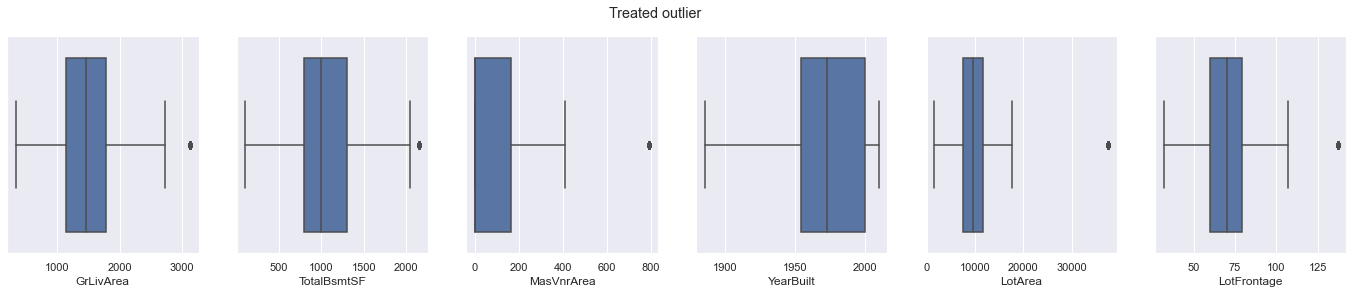

In [215]:
fig1,axs1 = plt.subplots(1,6,figsize= (24,4))

sns.boxplot(x=data.GrLivArea,ax=axs1[0])
sns.boxplot(x=data.TotalBsmtSF,ax=axs1[1])
sns.boxplot(x=data.MasVnrArea,ax=axs1[2])
sns.boxplot(x=data.YearBuilt,ax=axs1[3])
sns.boxplot(x=data.LotArea,ax=axs1[4])
sns.boxplot(x=data.LotFrontage,ax=axs1[5])

plt.suptitle('Treated outlier')
plt.show()

<H2 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#98E0C8;"><br>Train Test Split of the Data<br></H2>

In [216]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;">
          Check the shape of train and test split data
</p>
</pre>
</div>

In [217]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1022, 193), (1022,), (438, 193), (438,))

<H2 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#98E0C8;"><br>Scale the Data<br></H2>

In [223]:
columns_in_dataframe = x.columns
list_of_columns_to_scale = []
for cols in x:
    if cols in numerical_column:
        list_of_columns_to_scale.append(cols)

        
preprocessor = ColumnTransformer(
                       transformers=[('num',StandardScaler(),list_of_columns_to_scale),
                                     ],
                        remainder= 'passthrough'
                                )
x_train_scale = pd.DataFrame(preprocessor.fit_transform(x_train),columns = columns_in_dataframe) 
x_test_scale = pd.DataFrame(preprocessor.transform(x_test), columns = columns_in_dataframe)
Xs = pd.DataFrame(preprocessor.fit_transform(x),columns = columns_in_dataframe)

<H2 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#98E0C8;"><br>Feature Selection<br></H2>

<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>from Select from Model using Random Forest Regressor<br></H6>

In [227]:
RF = RandomForestRegressor(random_state=42).fit(x_train_scale,y_train)
imp1=RF.feature_importances_

sfm = SelectFromModel(RF,prefit=True)

x_newtrain = sfm.transform(x_train_scale)
x_newtest = sfm.transform(x_test_scale)

x_newtest.shape

(438, 16)

<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>from PCA<br></H6>

In [229]:
pca = PCA(n_components=20,random_state=42).fit(x_train_scale)

x_train_pca=pca.transform(x_train_scale)
x_test_pca = pca.transform(x_test_scale)

<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>from RFE feature selection using K fold and Decision tree regresor<br></H6>

<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;">
<b> code to get the number of features to be selected</b>
def get_models():
    models = dict()
    for i in range(2, 210): 
        rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=i) 
        model = DecisionTreeRegressor()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
        return models 
#evaluate a give model using cross-validation 
def evaluate_model(model, X, y): 
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return n_scores 
#get the models to evaluate 
models = get_models() 
#evaluate the models and store results 
results, names = list(), list() 
for name, model in models.items(): 
    scores = evaluate_model(model, X, y) 
    results.append(scores) 
    names.append(name) 
print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
</p>
</pre>
</div>


In [231]:
# identify the features for 22 features
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=22).fit(x_train_scale,y_train)

x_train_rfe= rfe.fit_transform(x_train_scale,y_train)
x_test_rfe = rfe.fit_transform(x_test_scale,y_test)


<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>Function to find and print the evaluation metrics of the model<br></H6>

In [251]:
def evaluate (s,y_true,y_predict):
    mae = mean_absolute_error(y_true,y_predict)
    mse = mean_squared_error(y_true,y_predict)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true,y_predict)
    P = s[1] #len(x_train.columns)
    N = s[0] #len(x_train.index)
    adjr2 = (1-((1-r2)*(N-1)/(N-P-1)))
    print("Mean absolute Error : {:0.4f}".format(mae))
    print("Mean Squared Error : {:0.4f}".format(mse))
    print("Root Mean Squared Error : {:0.4f}".format(rmse))
    print("R2 Score : {:0.4f}".format(r2))
    print("Adjusted R2 Score : {:0.4f}".format(adjr2))
    return (mae,mse,rmse,r2,adjr2)
    

In [236]:
corr_features = xx.corrwith(y).sort_values(ascending=False)
corr_feature = np.array(x.columns[:16])

<H2 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#98E0C8;"><br>Testing ML Algoritms<br></H2>

<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>Random Forest Regressor<br></H6>

In [252]:
# Fitting RF with the whole dataset

RF = RandomForestRegressor(random_state=100)
RF.fit(x_train,y_train)
y_pred_RF = RF.predict(x_test)
print('\t\t\tRF with whole dataset\n')
RF_Whole_mae, RF_Whole_mse, RF_Whole_rmse, RF_Whole_r2, RF_Whole_adjr2 = evaluate(x_train.shape,y_test,y_pred_RF)
rf =[RF_Whole_mae, RF_Whole_mse, RF_Whole_rmse, RF_Whole_r2, RF_Whole_adjr2]

################################################################################################################

# Fitting the model with selectfrommodel using RF 
 
RF1 = RandomForestRegressor(random_state=42)
RF1.fit(x_newtrain,y_train)
y_pred_RF1=RF1.predict(x_newtest)
print('\n\t\t\tRF with selected features from select from model using RF\n')
RF_SFM_mae, RF_SFM_mse, RF_SFM_rmse, RF_SFM_r2, RF_SFM_adjr2 = evaluate(x_newtrain.shape,y_test,y_pred_RF1)
rf.extend([RF_SFM_mae, RF_SFM_mse, RF_SFM_rmse, RF_SFM_r2, RF_SFM_adjr2])

################################################################################################################

# Fitting the RandomForest with the  correlated features with Saleprice obtained from the corrwith() function.

RF2 = RandomForestRegressor(random_state=42)
RF2.fit(x_train[corr_feature],y_train)
y_pred_RF2=RF2.predict(x_test[corr_feature])
print('\n\t\t\tRF with selected features from correlation\n')
RF_Correlated_mae, RF_Correlated_mse, RF_Correlated_rmse, RF_Correlated_r2, RF_Correlated_adjr2 = evaluate(x_train[corr_feature].shape,y_test,y_pred_RF2)
rf.extend([RF_Correlated_mae, RF_Correlated_mse, RF_Correlated_rmse, RF_Correlated_r2, RF_Correlated_adjr2])

###################################################################################################################

# fitting with pca(whole data scaling)

RF_p =RandomForestRegressor(random_state=100).fit(x_train_pca,y_train)
y_predRFp = RF_p.predict(x_test_pca)
print('\n\t\t\t RF with pca\n')
RF_PCA_mae, RF_PCA_mse, RF_PCA_rmse, RF_PCA_r2, RF_PCA_adjr2 = evaluate(x_train_pca.shape,y_test,y_predRFp)
rf.extend([RF_PCA_mae, RF_PCA_mse, RF_PCA_rmse, RF_PCA_r2, RF_PCA_adjr2])

###################################################################################################################

#fitting with rfe

RF_rfe = RandomForestRegressor(random_state=42).fit(x_train_rfe,y_train)
y_predict_rfe = RF_rfe.predict(x_test_rfe)
print('\n\t\t\t RF with rfe\n')
RF_RFE_mae, RF_RFE_mse, RF_RFE_rmse, RF_RFE_r2, RF_RFE_adjr2 = evaluate(x_train_rfe.shape,y_test,y_predict_rfe)
rf.extend([RF_RFE_mae, RF_RFE_mse, RF_RFE_rmse, RF_RFE_r2, RF_RFE_adjr2])



			RF with whole dataset

Mean absolute Error : 17124.7076
Mean Squared Error : 795826346.5648
Root Mean Squared Error : 28210.3943
R2 Score : 0.8860
Adjusted R2 Score : 0.8594

			RF with selected features from select from model using RF

Mean absolute Error : 18168.2788
Mean Squared Error : 786422885.5645
Root Mean Squared Error : 28043.2324
R2 Score : 0.8873
Adjusted R2 Score : 0.8855

			RF with selected features from correlation

Mean absolute Error : 18573.1734
Mean Squared Error : 889131659.9673
Root Mean Squared Error : 29818.3108
R2 Score : 0.8726
Adjusted R2 Score : 0.8706

			 RF with pca

Mean absolute Error : 18903.3308
Mean Squared Error : 942034715.8371
Root Mean Squared Error : 30692.5841
R2 Score : 0.8650
Adjusted R2 Score : 0.8623

			 RF with rfe

Mean absolute Error : 21031.5914
Mean Squared Error : 945023713.7538
Root Mean Squared Error : 30741.2380
R2 Score : 0.8646
Adjusted R2 Score : 0.8616


<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>Gradient Boosting Regressor<br></H6>

In [254]:
GBR = GradientBoostingRegressor(random_state=100)

# GBR with whole data

print("\n\t\t\t GBR with full data \n")
GBR = GradientBoostingRegressor(random_state=100).fit(x_train,y_train)
y_pred_GBR1 = GBR.predict(x_test)
GBR_Whole_mae, GBR_Whole_mse, GBR_Whole_rmse, GBR_Whole_r2, GBR_Whole_adjr2 = evaluate(x_train.shape,y_test,y_pred_GBR1)
gbr_m = [GBR_Whole_mae, GBR_Whole_mse, GBR_Whole_rmse, GBR_Whole_r2, GBR_Whole_adjr2]

#################################################################################################################


# GBR with Selectfrom model features

print ('\n\t\t\t GBR with SFM RF \n')
GBR = GradientBoostingRegressor(random_state=100).fit(x_newtrain,y_train)
y_pred_GBR3 = GBR.predict(x_newtest)
GBR_SFM_mae, GBR_SFM_mse, GBR_SFM_rmse, GBR_SFM_r2, GBR_SFM_adjr2 = evaluate(x_newtrain.shape,y_test,y_pred_GBR3)
gbr_m.extend([GBR_SFM_mae, GBR_SFM_mse, GBR_SFM_rmse, GBR_SFM_r2, GBR_SFM_adjr2])

#################################################################################################################

# GBR with correlated features

print ('\n\t\t\t GBR with correlated features \n')
GBR = GradientBoostingRegressor(random_state=100).fit(x_train_scale[corr_feature],y_train)
y_pred_GBR2 = GBR.predict(x_test_scale[corr_feature])
GBR_Correlated_mae, GBR_Correlated_mse, GBR_Correlated_rmse, GBR_Correlated_r2, GBR_Correlated_adjr2 = evaluate(x_train_scale[corr_feature].shape,y_test,y_pred_GBR2)
gbr_m.extend([GBR_Correlated_mae, GBR_Correlated_mse, GBR_Correlated_rmse, GBR_Correlated_r2, GBR_Correlated_adjr2])


#################################################################################################################

# GBR with PCA features
print ('\n\t\t\t GBR with PCA  \n')
GBR = GradientBoostingRegressor(random_state=100).fit(x_train_pca,y_train)
y_pred_GBR4 = GBR.predict(x_test_pca)
GBR_PCA_mae, GBR_PCA_mse, GBR_PCA_rmse, GBR_PCA_r2, GBR_PCA_adjr2 = evaluate(x_train_pca.shape,y_test,y_pred_GBR4)
gbr_m.extend([GBR_PCA_mae, GBR_PCA_mse, GBR_PCA_rmse, GBR_PCA_r2, GBR_PCA_adjr2])

#################################################################################################################
# GBR with RFE features

print ('\n\t\t\t GBR with RFE  \n')
GBR = GradientBoostingRegressor(random_state=100).fit(x_train_rfe,y_train)
y_pred_GBR5 = GBR.predict(x_test_rfe)
GBR_RFE_mae, GBR_RFE_mse, GBR_RFE_rmse, GBR_RFE_r2, GBR_RFE_adjr2 = evaluate(x_train_rfe.shape,y_test,y_pred_GBR5)
gbr_m.extend([GBR_RFE_mae, GBR_RFE_mse, GBR_RFE_rmse, GBR_RFE_r2, GBR_RFE_adjr2])


			 GBR with full data 

Mean absolute Error : 15880.7577
Mean Squared Error : 669769102.1438
Root Mean Squared Error : 25879.8976
R2 Score : 0.9040
Adjusted R2 Score : 0.8816

			 GBR with SFM RF 

Mean absolute Error : 17979.9441
Mean Squared Error : 837816316.7499
Root Mean Squared Error : 28945.0569
R2 Score : 0.8799
Adjusted R2 Score : 0.8780

			 GBR with correlated features 

Mean absolute Error : 17782.0464
Mean Squared Error : 748680011.3345
Root Mean Squared Error : 27362.0177
R2 Score : 0.8927
Adjusted R2 Score : 0.8910

			 GBR with PCA  

Mean absolute Error : 18523.8077
Mean Squared Error : 941294797.8848
Root Mean Squared Error : 30680.5280
R2 Score : 0.8651
Adjusted R2 Score : 0.8624

			 GBR with RFE  

Mean absolute Error : 19588.9483
Mean Squared Error : 887140993.4502
Root Mean Squared Error : 29784.9122
R2 Score : 0.8729
Adjusted R2 Score : 0.8701


<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>XGBoost<br></H6>

In [255]:
XGB = XGBRegressor()

# XGB for whole data

print('\n\t\t\t XGB with full data\n')
XGB = XGBRegressor().fit(x_train_scale,y_train)
y_pred_xgb = XGB.predict(x_test_scale)
XGBoost_Whole_mae, XGBoost_Whole_mse, XGBoost_Whole_rmse, XGBoost_Whole_r2, XGBoost_Whole_adjr2 = evaluate(x_train_scale.shape,y_test,y_pred_xgb)
xgb_m = [XGBoost_Whole_mae, XGBoost_Whole_mse, XGBoost_Whole_rmse, XGBoost_Whole_r2, XGBoost_Whole_adjr2]

###########################################################################################################

# XGB with SFM RF

print('\n\t\t\t XGB with SFM RF\n')
XGB = XGBRegressor().fit(x_newtrain,y_train)
y_pred_xgb = XGB.predict(x_newtest)
XGBoost_SFM_mae, XGBoost_SFM_mse, XGBoost_SFM_rmse, XGBoost_SFM_r2, XGBoost_SFM_adjr2 = evaluate(x_newtrain.shape,y_test,y_pred_xgb)
xgb_m.extend([XGBoost_SFM_mae, XGBoost_SFM_mse, XGBoost_SFM_rmse, XGBoost_SFM_r2, XGBoost_SFM_adjr2])

###########################################################################################################

# XGB with correlated features

print('\n\t\t\t XGB with correlated features\n')
XGB = XGBRegressor().fit(x_train_scale[corr_feature],y_train)
y_pred_xgb = XGB.predict(x_test_scale[corr_feature])
XGBoost_Correlated_mae, XGBoost_Correlated_mse, XGBoost_Correlated_rmse, XGBoost_Correlated_r2, XGBoost_Correlated_adjr2 = evaluate(x_train_scale[corr_feature].shape,y_test,y_pred_xgb)
xgb_m.extend([XGBoost_Correlated_mae, XGBoost_Correlated_mse, XGBoost_Correlated_rmse, XGBoost_Correlated_r2, XGBoost_Correlated_adjr2])

###########################################################################################################

# XGB with PCA

print('\n\t\t\t XGB with PCA\n')
XGB = XGBRegressor().fit(x_train_pca,y_train)
y_pred_xgb = XGB.predict(x_test_pca)
XGBoost_PCA_mae, XGBoost_PCA_mse, XGBoost_PCA_rmse, XGBoost_PCA_r2, XGBoost_PCA_adjr2 = evaluate(x_train_pca.shape,y_test,y_pred_xgb)
xgb_m.extend([XGBoost_PCA_mae, XGBoost_PCA_mse, XGBoost_PCA_rmse, XGBoost_PCA_r2, XGBoost_PCA_adjr2])

###########################################################################################################


# XGB with RFE

print('\n\t\t\t XGB with RFE\n')
XGB = XGBRegressor().fit(x_train_rfe,y_train)
y_pred_xgb = XGB.predict(x_test_rfe)
XGBoost_RFE_mae, XGBoost_RFE_mse, XGBoost_RFE_rmse, XGBoost_RFE_r2, XGBoost_RFE_adjr2 = evaluate(x_train_rfe.shape,y_test,y_pred_xgb)
xgb_m.extend([XGBoost_RFE_mae, XGBoost_RFE_mse, XGBoost_RFE_rmse, XGBoost_RFE_r2, XGBoost_RFE_adjr2])



			 XGB with full data

Mean absolute Error : 16448.4128
Mean Squared Error : 722040963.0969
Root Mean Squared Error : 26870.8199
R2 Score : 0.8965
Adjusted R2 Score : 0.8724

			 XGB with SFM RF

Mean absolute Error : 19270.8456
Mean Squared Error : 905491924.7407
Root Mean Squared Error : 30091.3929
R2 Score : 0.8702
Adjusted R2 Score : 0.8682

			 XGB with correlated features

Mean absolute Error : 19256.7247
Mean Squared Error : 872866201.0402
Root Mean Squared Error : 29544.3091
R2 Score : 0.8749
Adjusted R2 Score : 0.8729

			 XGB with PCA

Mean absolute Error : 19337.1743
Mean Squared Error : 970130312.5615
Root Mean Squared Error : 31146.9150
R2 Score : 0.8610
Adjusted R2 Score : 0.8582

			 XGB with RFE

Mean absolute Error : 21862.2268
Mean Squared Error : 1155406119.1181
Root Mean Squared Error : 33991.2653
R2 Score : 0.8344
Adjusted R2 Score : 0.8308


<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>Linear regression<br></H6>

In [256]:
Linear1 = LinearRegression()

# Linear Regression for whole data

print('\n\t\t\t Linear Regression with full data\n')
Linear1 = LinearRegression().fit(x_train_scale,y_train)
y_pred_linear = Linear1.predict(x_test_scale)
Linear_Whole_mae, Linear_Whole_mse, Linear_Whole_rmse, Linear_Whole_r2, Linear_Whole_adjr2 = evaluate(x_train_scale.shape,y_test,y_pred_linear)
linear_m = [Linear_Whole_mae, Linear_Whole_mse, Linear_Whole_rmse, Linear_Whole_r2, Linear_Whole_adjr2]

###########################################################################################################

# Linear Regression with SFM RF

print('\n\t\t\t Linear Regression with SFM RF\n')
Linear1 = LinearRegression().fit(x_newtrain,y_train)
y_pred_linear = Linear1.predict(x_newtest)
Linear_SFM_mae, Linear_SFM_mse, Linear_SFM_rmse, Linear_SFM_r2, Linear_SFM_adjr2 = evaluate(x_newtrain.shape,y_test,y_pred_linear)
linear_m.extend([Linear_SFM_mae, Linear_SFM_mse, Linear_SFM_rmse, Linear_SFM_r2, Linear_SFM_adjr2])

###########################################################################################################

# Linear Regression with correlated features

print('\n\t\t\t Linear Regression with correlated features\n')
Linear1 = LinearRegression().fit(x_train_scale[corr_feature],y_train)
y_pred_linear = Linear1.predict(x_test_scale[corr_feature])
Linear_Correlated_mae, Linear_Correlated_mse, Linear_Correlated_rmse, Linear_Correlated_r2, Linear_Correlated_adjr2 = evaluate(x_train_scale[corr_feature].shape,y_test,y_pred_linear)
linear_m.extend([Linear_Correlated_mae, Linear_Correlated_mse, Linear_Correlated_rmse, Linear_Correlated_r2, Linear_Correlated_adjr2])

###########################################################################################################

# Linear Regression with PCA

print('\n\t\t\t Linear Regression with PCA\n')
Linear1 = LinearRegression().fit(x_train_pca,y_train)
y_pred_linear = Linear1.predict(x_test_pca)
Linear_PCA_mae, Linear_PCA_mse, Linear_PCA_rmse, Linear_PCA_r2, Linear_PCA_adjr2 = evaluate(x_train_pca.shape,y_test,y_pred_linear)
linear_m.extend([Linear_PCA_mae, Linear_PCA_mse, Linear_PCA_rmse, Linear_PCA_r2, Linear_PCA_adjr2])

###########################################################################################################


# Linear Regression with RFE

print('\n\t\t\t Linear Regression with RFE\n')
Linear1 = LinearRegression().fit(x_train_rfe,y_train)
y_pred_linear = Linear1.predict(x_test_rfe)
Linear_RFE_mae, Linear_RFE_mse, Linear_RFE_rmse, Linear_RFE_r2, Linear_RFE_adjr2 = evaluate(x_train_rfe.shape,y_test,y_pred_linear)
linear_m.extend([Linear_RFE_mae, Linear_RFE_mse, Linear_RFE_rmse, Linear_RFE_r2, Linear_RFE_adjr2])



			 Linear Regression with full data

Mean absolute Error : 25767245619671.3867
Mean Squared Error : 200627183214302783277361004544.0000
Root Mean Squared Error : 447914258775385.2500
R2 Score : -28751001360477106176.0000
Adjusted R2 Score : -35452623658269474816.0000

			 Linear Regression with SFM RF

Mean absolute Error : 22519.2140
Mean Squared Error : 1224730546.5496
Root Mean Squared Error : 34996.1505
R2 Score : 0.8245
Adjusted R2 Score : 0.8217

			 Linear Regression with correlated features

Mean absolute Error : 22043.0448
Mean Squared Error : 1196256386.8628
Root Mean Squared Error : 34586.9395
R2 Score : 0.8286
Adjusted R2 Score : 0.8258

			 Linear Regression with PCA

Mean absolute Error : 22463.4230
Mean Squared Error : 1293495350.6394
Root Mean Squared Error : 35965.1964
R2 Score : 0.8146
Adjusted R2 Score : 0.8109

			 Linear Regression with RFE

Mean absolute Error : 30187.3282
Mean Squared Error : 1637103155.0210
Root Mean Squared Error : 40461.1314
R2 Score : 0.765

<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>Ridge<br></H6>

In [257]:
ridge1 = Ridge(alpha = 30)


# Ridge for whole data

print('\n\t\t\t Ridge with full data\n')
ridge1.fit(x_train_scale,y_train)
y_pred_ridge = ridge1.predict(x_test_scale)
Ridge_Whole_mae, Ridge_Whole_mse, Ridge_Whole_rmse, Ridge_Whole_r2, Ridge_Whole_adjr2 = evaluate(x_train_scale.shape,y_test,y_pred_ridge)
ridge_m =[Ridge_Whole_mae, Ridge_Whole_mse, Ridge_Whole_rmse, Ridge_Whole_r2, Ridge_Whole_adjr2]

###########################################################################################################

# Ridge with SFM RF

print('\n\t\t\t Ridge with SFM RF\n')
ridge1.fit(x_newtrain,y_train)
y_pred_ridge = ridge1.predict(x_newtest)
Ridge_SFM_mae, Ridge_SFM_mse, Ridge_SFM_rmse, Ridge_SFM_r2, Ridge_SFM_adjr2 = evaluate(x_newtrain.shape,y_test,y_pred_ridge)
ridge_m.extend([Ridge_SFM_mae, Ridge_SFM_mse, Ridge_SFM_rmse, Ridge_SFM_r2, Ridge_SFM_adjr2])

###########################################################################################################

# Ridge with correlated features

print('\n\t\t\t Ridge with correlated features\n')
ridge1.fit(x_train_scale[corr_feature],y_train)
y_pred_ridge = ridge1.predict(x_test_scale[corr_feature])
Ridge_Correlated_mae, Ridge_Correlated_mse, Ridge_Correlated_rmse, Ridge_Correlated_r2, Ridge_Correlated_adjr2 = evaluate(x_train_scale[corr_feature].shape,y_test,y_pred_ridge)
ridge_m.extend([Ridge_Correlated_mae, Ridge_Correlated_mse, Ridge_Correlated_rmse, Ridge_Correlated_r2, Ridge_Correlated_adjr2])

###########################################################################################################

# Ridge with PCA

print('\n\t\t\t Ridge with PCA\n')
ridge1.fit(x_train_pca,y_train)
y_pred_ridge = ridge1.predict(x_test_pca)
Ridge_PCA_mae, Ridge_PCA_mse, Ridge_PCA_rmse, Ridge_PCA_r2, Ridge_PCA_adjr2 = evaluate(x_train_pca.shape,y_test,y_pred_ridge)
ridge_m.extend([Ridge_PCA_mae, Ridge_PCA_mse, Ridge_PCA_rmse, Ridge_PCA_r2, Ridge_PCA_adjr2])

###########################################################################################################


# Ridge with RFE

print('\n\t\t\t Ridge with RFE\n')
ridge1.fit(x_train_rfe,y_train)
y_pred_ridge = ridge1.predict(x_test_rfe)
Ridge_RFE_mae, Ridge_RFE_mse, Ridge_RFE_rmse, Ridge_RFE_r2, Ridge_RFE_adjr2 = evaluate(x_train_rfe.shape,y_test,y_pred_ridge)
ridge_m.extend([Ridge_RFE_mae, Ridge_RFE_mse, Ridge_RFE_rmse, Ridge_RFE_r2, Ridge_RFE_adjr2])



			 Ridge with full data

Mean absolute Error : 17819.0553
Mean Squared Error : 863108403.3881
Root Mean Squared Error : 29378.7066
R2 Score : 0.8763
Adjusted R2 Score : 0.8475

			 Ridge with SFM RF

Mean absolute Error : 22099.6187
Mean Squared Error : 1214654825.7781
Root Mean Squared Error : 34851.8985
R2 Score : 0.8259
Adjusted R2 Score : 0.8232

			 Ridge with correlated features

Mean absolute Error : 21948.8469
Mean Squared Error : 1197980816.5128
Root Mean Squared Error : 34611.8595
R2 Score : 0.8283
Adjusted R2 Score : 0.8256

			 Ridge with PCA

Mean absolute Error : 22443.7553
Mean Squared Error : 1296278321.1554
Root Mean Squared Error : 36003.8654
R2 Score : 0.8142
Adjusted R2 Score : 0.8105

			 Ridge with RFE

Mean absolute Error : 27686.4759
Mean Squared Error : 1490199187.4097
Root Mean Squared Error : 38603.0982
R2 Score : 0.7864
Adjusted R2 Score : 0.7817


<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>Lasso<br></H6>

In [260]:
lasso3 =Lasso(alpha = 30)

# Lasso for whole data

print('\n\t\t\t Lasso with full data\n')
lasso3.fit(x_train_scale,y_train)
y_pred_lasso = lasso3.predict(x_test_scale)
Lasso_Whole_mae, Lasso_Whole_mse, Lasso_Whole_rmse, Lasso_Whole_r2, Lasso_Whole_adjr2 = evaluate(x_train_scale.shape,y_test,y_pred_lasso)
lasso_m =[Lasso_Whole_mae, Lasso_Whole_mse, Lasso_Whole_rmse, Lasso_Whole_r2, Lasso_Whole_adjr2]

###########################################################################################################

# Lasso with SFM RF

print('\n\t\t\t Lasso with SFM RF\n')
lasso3.fit(x_newtrain,y_train)
y_pred_lasso = lasso3.predict(x_newtest)
Lasso_SFM_mae, Lasso_SFM_mse, Lasso_SFM_rmse, Lasso_SFM_r2, Lasso_SFM_adjr2 = evaluate(x_newtrain.shape,y_test,y_pred_lasso)
lasso_m.extend([Lasso_SFM_mae, Lasso_SFM_mse, Lasso_SFM_rmse, Lasso_SFM_r2, Lasso_SFM_adjr2])

###########################################################################################################

# Lasso with correlated features

print('\n\t\t\t Lasso with correlated features\n')
lasso3.fit(x_train_scale[corr_feature],y_train)
y_pred_lasso = lasso3.predict(x_test_scale[corr_feature])
Lasso_Correlated_mae, Lasso_Correlated_mse, Lasso_Correlated_rmse, Lasso_Correlated_r2, Lasso_Correlated_adjr2 = evaluate(x_train_scale[corr_feature].shape,y_test,y_pred_lasso)
lasso_m.extend([Lasso_Correlated_mae, Lasso_Correlated_mse, Lasso_Correlated_rmse, Lasso_Correlated_r2, Lasso_Correlated_adjr2])

###########################################################################################################

# Lasso with PCA

print('\n\t\t\t Lasso with PCA\n')
lasso3.fit(x_train_pca,y_train)
y_pred_lasso = lasso3.predict(x_test_pca)
Lasso_PCA_mae, Lasso_PCA_mse, Lasso_PCA_rmse, Lasso_PCA_r2, Lasso_PCA_adjr2 = evaluate(x_train_pca.shape,y_test,y_pred_lasso)
lasso_m.extend([Lasso_PCA_mae, Lasso_PCA_mse, Lasso_PCA_rmse, Lasso_PCA_r2, Lasso_PCA_adjr2])

###########################################################################################################


# Lasso with RFE

print('\n\t\t\t Lasso with RFE\n')
lasso3.fit(x_train_rfe,y_train)
y_pred_lasso = lasso3.predict(x_test_rfe)
Lasso_RFE_mae, Lasso_RFE_mse, Lasso_RFE_rmse, Lasso_RFE_r2, Lasso_RFE_adjr2 = evaluate(x_train_rfe.shape,y_test,y_pred_lasso)
lasso_m.extend([Lasso_RFE_mae, Lasso_RFE_mse, Lasso_RFE_rmse, Lasso_RFE_r2, Lasso_RFE_adjr2])




			 Lasso with full data

Mean absolute Error : 18164.7316
Mean Squared Error : 796862673.7550
Root Mean Squared Error : 28228.7561
R2 Score : 0.8858
Adjusted R2 Score : 0.8592

			 Lasso with SFM RF

Mean absolute Error : 22477.4213
Mean Squared Error : 1223009584.8784
Root Mean Squared Error : 34971.5539
R2 Score : 0.8247
Adjusted R2 Score : 0.8219

			 Lasso with correlated features

Mean absolute Error : 22044.7389
Mean Squared Error : 1196638275.1888
Root Mean Squared Error : 34592.4598
R2 Score : 0.8285
Adjusted R2 Score : 0.8258

			 Lasso with PCA

Mean absolute Error : 22462.3008
Mean Squared Error : 1292920932.4872
Root Mean Squared Error : 35957.2097
R2 Score : 0.8147
Adjusted R2 Score : 0.8110

			 Lasso with RFE

Mean absolute Error : 29453.7234
Mean Squared Error : 1589749124.1928
Root Mean Squared Error : 39871.6582
R2 Score : 0.7722
Adjusted R2 Score : 0.7672


In [341]:
train_test_met = {'model' : ['RF_Whole', 'RF_SFM', 'RF_Correlated', 'RF_PCA', 'RF_RFE', 'GBR_Whole', 'GBR_SFM', 'GBR_Correlated', 'GBR_PCA', 'GBR_RFE', 'XGBoost_Whole', 'XGBoost_SFM', 'XGBoost_Correlated', 'XGBoost_PCA', 'XGBoost_RFE', 'Linear_Whole', 'Linear_SFM', 'Linear_Correlated', 'Linear_PCA', 'Linear_RFE', 'Ridge_Whole', 'Ridge_SFM', 'Ridge_Correlated', 'Ridge_PCA', 'Ridge_RFE', 'Lasso_Whole', 'Lasso_SFM', 'Lasso_Correlated', 'Lasso_PCA', 'Lasso_RFE'],
'mae' : [rf[0], rf[5], rf[10], rf[15], rf[20], gbr_m[0], gbr_m[5], gbr_m[10], gbr_m[15], gbr_m[20], xgb_m[0], xgb_m[5], xgb_m[10], xgb_m[15], xgb_m[20], linear_m[0], linear_m[5], linear_m[10], linear_m[15], linear_m[20], ridge_m[0], ridge_m[5], ridge_m[10], ridge_m[15], ridge_m[20], lasso_m[0], lasso_m[5], lasso_m[10], lasso_m[15], lasso_m[20]],
'mse' : [rf[1], rf[6], rf[11], rf[16], rf[21], gbr_m[1], gbr_m[6], gbr_m[11], gbr_m[16], gbr_m[21], xgb_m[1], xgb_m[6], xgb_m[11], xgb_m[16], xgb_m[21], linear_m[1], linear_m[6], linear_m[11], linear_m[16], linear_m[21], ridge_m[1], ridge_m[6], ridge_m[11], ridge_m[16], ridge_m[21], lasso_m[1], lasso_m[6], lasso_m[11], lasso_m[16], lasso_m[21]],
'msrt' : [rf[2], rf[7], rf[12], rf[17], rf[22], gbr_m[2], gbr_m[7], gbr_m[12], gbr_m[17], gbr_m[22], xgb_m[2], xgb_m[7], xgb_m[12], xgb_m[17], xgb_m[22], linear_m[2], linear_m[7], linear_m[12], linear_m[17], linear_m[22], ridge_m[2], ridge_m[7], ridge_m[12], ridge_m[17], ridge_m[22], lasso_m[2], lasso_m[7], lasso_m[12], lasso_m[17], lasso_m[22]],
'r2' : [rf[3], rf[8], rf[13], rf[18], rf[23], gbr_m[3], gbr_m[8], gbr_m[13], gbr_m[18], gbr_m[23], xgb_m[3], xgb_m[8], xgb_m[13], xgb_m[18], xgb_m[23], linear_m[3], linear_m[8], linear_m[13], linear_m[18], linear_m[23], ridge_m[3], ridge_m[8], ridge_m[13], ridge_m[18], ridge_m[23], lasso_m[3], lasso_m[8], lasso_m[13], lasso_m[18], lasso_m[23]],
'adjr2' : [rf[4], rf[9], rf[14], rf[19], rf[24], gbr_m[4], gbr_m[9], gbr_m[14], gbr_m[19], gbr_m[24], xgb_m[4], xgb_m[9], xgb_m[14], xgb_m[19], xgb_m[24], linear_m[4], linear_m[9], linear_m[14], linear_m[19], linear_m[24], ridge_m[4], ridge_m[9], ridge_m[14], ridge_m[19], ridge_m[24], lasso_m[4], lasso_m[9], lasso_m[14], lasso_m[19], lasso_m[24]]}
train_test_metric = pd.DataFrame(train_test_met)
#add a calculated column to find difference of r2 and adjusted r2
train_test_metric['r2 - adjr2'] = train_test_metric.r2 - train_test_metric.adjr2
train_test_metric.drop([15], inplace = True)

In [342]:
pd.options.display.float_format = '{:,.3f}'.format

train_test_metric.sort_values('r2 - adjr2')

,model,mae,mse,msrt,r2,adjr2,r2 - adjr2
7,GBR_Correlated,"17,782.046","748,680,011.334","27,362.018",0.893,0.891,0.002
1,RF_SFM,"18,168.279","786,422,885.564","28,043.232",0.887,0.886,0.002
6,GBR_SFM,"17,979.944","837,816,316.750","28,945.057",0.880,0.878,0.002
12,XGBoost_Correlated,"19,256.725","872,866,201.040","29,544.309",0.875,0.873,0.002
2,RF_Correlated,"18,573.173","889,131,659.967","29,818.311",0.873,0.871,0.002
11,XGBoost_SFM,"19,270.846","905,491,924.741","30,091.393",0.870,0.868,0.002
8,GBR_PCA,"18,523.808","941,294,797.885","30,680.528",0.865,0.862,0.003
3,RF_PCA,"18,903.331","942,034,715.837","30,692.584",0.865,0.862,0.003
17,Linear_Correlated,"22,043.045","1,196,256,386.863","34,586.940",0.829,0.826,0.003
27,Lasso_Correlated,"22,044.739","1,196,638,275.189","34,592.460",0.829,0.826,0.003


<H2 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#98E0C8;"><br>Applying CV select the model<br></H2>

<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>Random forest with CV<br></H6>

In [330]:
RF = RandomForestRegressor(random_state=42)
RF.fit(x,y)
s= x.shape
P = s[1] #len(x.columns)
N = s[0] #len(x.index)
RF_R2 = cross_val_score(RF,x,y,scoring='r2',cv=10)
RF_adjr2 = (1-((1-RF_R2)*(N-1)/(N-P-1)))
rfr = [RF_R2.mean(),RF_R2.std()]
rfr.extend([RF_adjr2.mean(),RF_adjr2.std()])

RF_RMSE = cross_val_score(RF,x,y,scoring='neg_root_mean_squared_error',cv=10)
rfr.extend([RF_RMSE.mean(),RF_RMSE.std()])


<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>Gradient Boosting Regressor with CV<br></H6>

In [333]:
GBR = GradientBoostingRegressor(random_state=42)
GBR.fit(X,y)
s=X.shape
P = s[1] 
N = s[0] 

GBR_R2 = cross_val_score(GBR,x,y,scoring='r2',cv=10)
GBR_adjr2 = (1-((1-GBR_R2)*(N-1)/(N-P-1)))
gbr = [GBR_R2.mean(),GBR_R2.std()]
gbr.extend([GBR_adjr2.mean(),GBR_adjr2.std()])

GBR_RMSE = cross_val_score(GBR,x,y,scoring='neg_root_mean_squared_error',cv=10)
gbr.extend([GBR_RMSE.mean(),GBR_RMSE.std()])

GBR.fit(Xs,y)
s=Xs.shape
P = s[1] 
N = s[0]
GBR_R2 = cross_val_score(GBR,Xs,y,scoring='r2',cv=10)
GBR_adjr2 = (1-((1-GBR_R2)*(N-1)/(N-P-1)))
gbr.extend([GBR_R2.mean(),GBR_R2.std()])
gbr.extend([GBR_adjr2.mean(),GBR_adjr2.std()])

GBR_RMSE = cross_val_score(GBR,Xs,y,scoring='neg_root_mean_squared_error',cv=10)
gbr.extend([GBR_RMSE.mean(),GBR_RMSE.std()])


<H6 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#1A956C;"><br>XGBoost Regressor with CV<br></H6>

In [337]:
XGB = XGBRegressor(random_state=42)
XGB.fit(X,y)
s=X.shape
P = s[1] 
N = s[0]

XGB_R2 = cross_val_score(GBR,X,y,scoring='r2',cv=10)
XGB_adjr2 = (1-((1-XGB_R2)*(N-1)/(N-P-1)))
xgb = [XGB_R2.mean(),XGB_R2.std()]
xgb.extend([XGB_adjr2.mean(),XGB_adjr2.std()])

XGB_RMSE = cross_val_score(GBR,X,y,scoring='neg_root_mean_squared_error',cv=10)
xgb.extend([XGB_RMSE.mean(),XGB_RMSE.std()])

XGB.fit(x,y)
s=x.shape
P = s[1] 
N = s[0]
XGB_R2 = cross_val_score(GBR,Xs,y,scoring='r2',cv=10)
XGB_adjr2 = (1-((1-XGB_R2)*(N-1)/(N-P-1)))
xgb.extend([XGB_R2.mean(),XGB_R2.std()])
xgb.extend([XGB_adjr2.mean(),XGB_adjr2.std()])

XGB_RMSE = cross_val_score(GBR,Xs,y,scoring='neg_root_mean_squared_error',cv=10)
xgb.extend([XGB_RMSE.mean(),XGB_RMSE.std()])

In [338]:
cvs = {'Model': ['Random Forest','Gbr no scale','GBR less scale','XGB','XGB less scale'],
      'R2 mean': [rfr[0],gbr[0],gbr[6],xgb[0],xgb[6]],
      'R2 std': [rfr[1],gbr[1],gbr[7],xgb[1],xgb[6]],
       'Adj_R2 mean': [rfr[2],gbr[2],gbr[8],xgb[2],xgb[8]],
       'Adj_R2 std': [rfr[3],gbr[3],gbr[9],xgb[3],xgb[9]],
       'RMSE mean':[rfr[4],gbr[4],gbr[10],xgb[4],xgb[10]],
       'RMSE std':[rfr[5],gbr[5],gbr[11],xgb[5],xgb[11]]
      }
CVS_metric =pd.DataFrame(cvs)
CVS_metric

,Model,R2 mean,R2 std,Adj_R2 mean,Adj_R2 std,RMSE mean,RMSE std
0,Random Forest,0.860,0.047,0.839,0.054,"-29,190.378","6,487.997"
1,Gbr no scale,0.877,0.043,0.857,0.051,"-27,169.916","5,491.952"
2,GBR less scale,0.880,0.041,0.861,0.048,"-26,953.891","5,471.351"
3,XGB,0.890,0.036,0.872,0.042,"-25,781.833","4,936.149"
4,XGB less scale,0.880,0.880,0.861,0.048,"-26,953.891","5,471.351"


<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;">
          The metrics obtained from the train test split is better than the CV method.
          SO proceeding with the train test methodology
</p>
</pre>
</div>

<H2 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#98E0C8;"><br>Hyper Parameter Tunning<br></H2>

In [347]:
# current model 
GBR = GradientBoostingRegressor(random_state=100).fit(x_train_scale[corr_feature],y_train)
y_pred_GBR2 = GBR.predict(x_test_scale[corr_feature])
s = x_train_scale[corr_feature].shape
P = s[1] 
N = s[0] 
mae = mean_absolute_error(y_test,y_pred_GBR2)
mse = mean_squared_error(y_test,y_pred_GBR2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred_GBR2)
    
adjr2 = (1-((1-r2)*(N-1)/(N-P-1)))
print("Mean absolute Error : {:0.4f}".format(mae))
print("Mean Squared Error : {:0.4f}".format(mse))
print("Root Mean Squared Error : {:0.4f}".format(rmse))
print("R2 Score : {:0.4f}".format(r2))
print("Adjusted R2 Score : {:0.4f}".format(adjr2))
    

Mean absolute Error : 17782.0464
Mean Squared Error : 748680011.3345
Root Mean Squared Error : 27362.0177
R2 Score : 0.8927
Adjusted R2 Score : 0.8910


<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;">
          Checking parameter list with RandomizedsearchCV 
</p>
</pre>
</div>

In [354]:
# Randomized search
GBR=GradientBoostingRegressor()
parameters = {"learning_rate": [.001,0.01,.1,0.02,0.03,0.04],
                  "subsample"    : [.2,.5,.75,1],
                  "n_estimators" : [500,1000,1500,2000],
                  "max_depth"    : [1,2,4,8,10,15]
                 }
randm = RandomizedSearchCV(estimator=GBR, param_distributions = parameters,cv = 5, n_iter = 10, n_jobs=-1)
randm.fit(x_train_scale[corr_feature],y_train)
print(" Results from Random Search " )
print("The best estimator across ALL searched params:", randm.best_estimator_)
print("The best score across ALL searched params:", randm.best_score_)
print("The best parameters across ALL searched params:", randm.best_params_)

 Results from Random Search 
The best estimator across ALL searched params: GradientBoostingRegressor(learning_rate=0.01, max_depth=8, n_estimators=500,
                          subsample=0.75)
The best score across ALL searched params: 0.8094235302871109
The best parameters across ALL searched params: {'subsample': 0.75, 'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.01}


<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;">
          Doing a through check on the parameters obtained with Randomized search using gridsearchCV
</p>
</pre>
</div>

In [355]:
#Tunning the model
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[0.01,0.05],'max_depth':[7,8,9],'subsample':[.74,.75,.76],'random_state':[100]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=5)
search.fit(x_train_scale[corr_feature],y_train)
search.best_params_

{'learning_rate': 0.01,
 'max_depth': 8,
 'n_estimators': 500,
 'random_state': 100,
 'subsample': 0.74}

<H2 style="border:#055E7C;border-width:7px; border-style:ridge; background-color:#98E0C8;"><br>Conclusion the best model obtained<br></H2>

In [359]:

GBR = GradientBoostingRegressor(learning_rate=0.01,max_depth=8,n_estimators=500,subsample=0.74,random_state=100)
GBR.fit(x_train_scale[corr_feature],y_train)
y_pred_GBR2 = GBR.predict(x_test_scale[corr_feature])
s = x_train_scale[corr_feature].shape
P = s[1] 
N = s[0] 
mae = mean_absolute_error(y_test,y_pred_GBR2)
mse = mean_squared_error(y_test,y_pred_GBR2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred_GBR2)
    
adjr2 = (1-((1-r2)*(N-1)/(N-P-1)))
print("Mean absolute Error : {:0.4f}".format(mae))
print("Mean Squared Error : {:0.4f}".format(mse))
print("Root Mean Squared Error : {:0.4f}".format(rmse))
print("R2 Score : {:0.4f}".format(r2))
print("Adjusted R2 Score : {:0.4f}".format(adjr2))

Mean absolute Error : 17215.0018
Mean Squared Error : 671001015.3396
Root Mean Squared Error : 25903.6873
R2 Score : 0.9038
Adjusted R2 Score : 0.9023


<div style="border:#CA7208;border-width:5px; border-style:inset; background-color:#599782;">
<pre>
<p style="border:CA7208;border-width:3px; border-style:outset; background-color:#74CAC2;">
          The Best ML algorithm suited for this dataset is found to be GradientBoostingRegressor
          
|Metric||Value|
 |----||----| 
 |Mean Absolute Error||17215|
 |Mean Squared Error||671001015|
 |Root Mean Squared Error||25903.69|
 |R2 Score||0.9038|
 |Adjusted R2 Score||0.9023|


</p>
</pre>  
</div>
 